# Hello World AML pipeline with components

The purpose of this tutorial is to show how to incrementally build a pipeline from simple and debuggable "Hello World" components. In order to run this at home, you may find it useful to create a free Azure ML subscription as described in the how-to guide I have [here](../../additional/data_science/aml/free_subscription.html)

In [ ]:
ls ../../additional/data_science/aml

free_subscription.ipynb


## Starting development with a notebook 

In this section, we will write our code in a notebook and make sure it works well. Then, we will convert it to a script and run it from the terminal. Finally, we will add some logs with MLFlow. 

Although not required, as a very first step we can create a environment and kernel following the tutorial in https://learn.microsoft.com/en-gb/azure/machine-learning/tutorial-cloud-workstation?view=azureml-api-2

Following the previous tutorial, create a notebook and type the following hello world code:

In [ ]:
def hello_world (name):
    """Greets the indicated person and the world in general."""
    
    print (f"Hello {name} and world")

hello_world ("Jaume")

Hello Jaume and world


Fantastic, the code works ;-). Now, let's convert it to a script that can be run from terminal. The tutorial above explains how to convert the notebook to a python file. In our case, we will first add an argument parser and then write it to file using the magic cell `%%writefile`

In [ ]:
%%writefile hello_world_core.py
import argparse

def hello_world (name):
    """Greets the indicated person and the world in general."""
    
    print (f"Hello {name} and world")

def parse_args ():
    """Parses input arguments"""
    
    parser = argparse.ArgumentParser()
    parser.add_argument("--name", type=str, help="person to greet")
    args = parser.parse_args()
    
    return args

def main():
    """Main function of the script."""
    
    args = parse_args ()
    hello_world (args.name)

if __name__ == "__main__":
    main()

Overwriting hello_world_core.py


Now, we can open up a terminal, as illustrated in the tutorial above, cd to the folder where the script is and run it:

```bash
cd  Users/<my_user>/hello_world
python hello_world_core.py --name Jaume
```

### Adding logs with MLflow

In [ ]:
%%writefile hello_world_with_logs.py
import mlflow
from hello_world_core import hello_world, parse_args

def start_logging (args):
    # set name for logging
    mlflow.set_experiment("Hello World with logging")
    mlflow.start_run()
    mlflow.log_param ("name to log", args.name)
    
def finish_logging ():
    mlflow.end_run ()

def main():
    """Main function of the script."""
    args = parse_args ()
    start_logging (args)
    hello_world (args.name)
    finish_logging ()

if __name__ == "__main__":
    main()

Overwriting hello_world_with_logs.py


Let's run it and see:

```bash
python hello_world_with_logs.py --name Peter
```

Here is the newly created job:

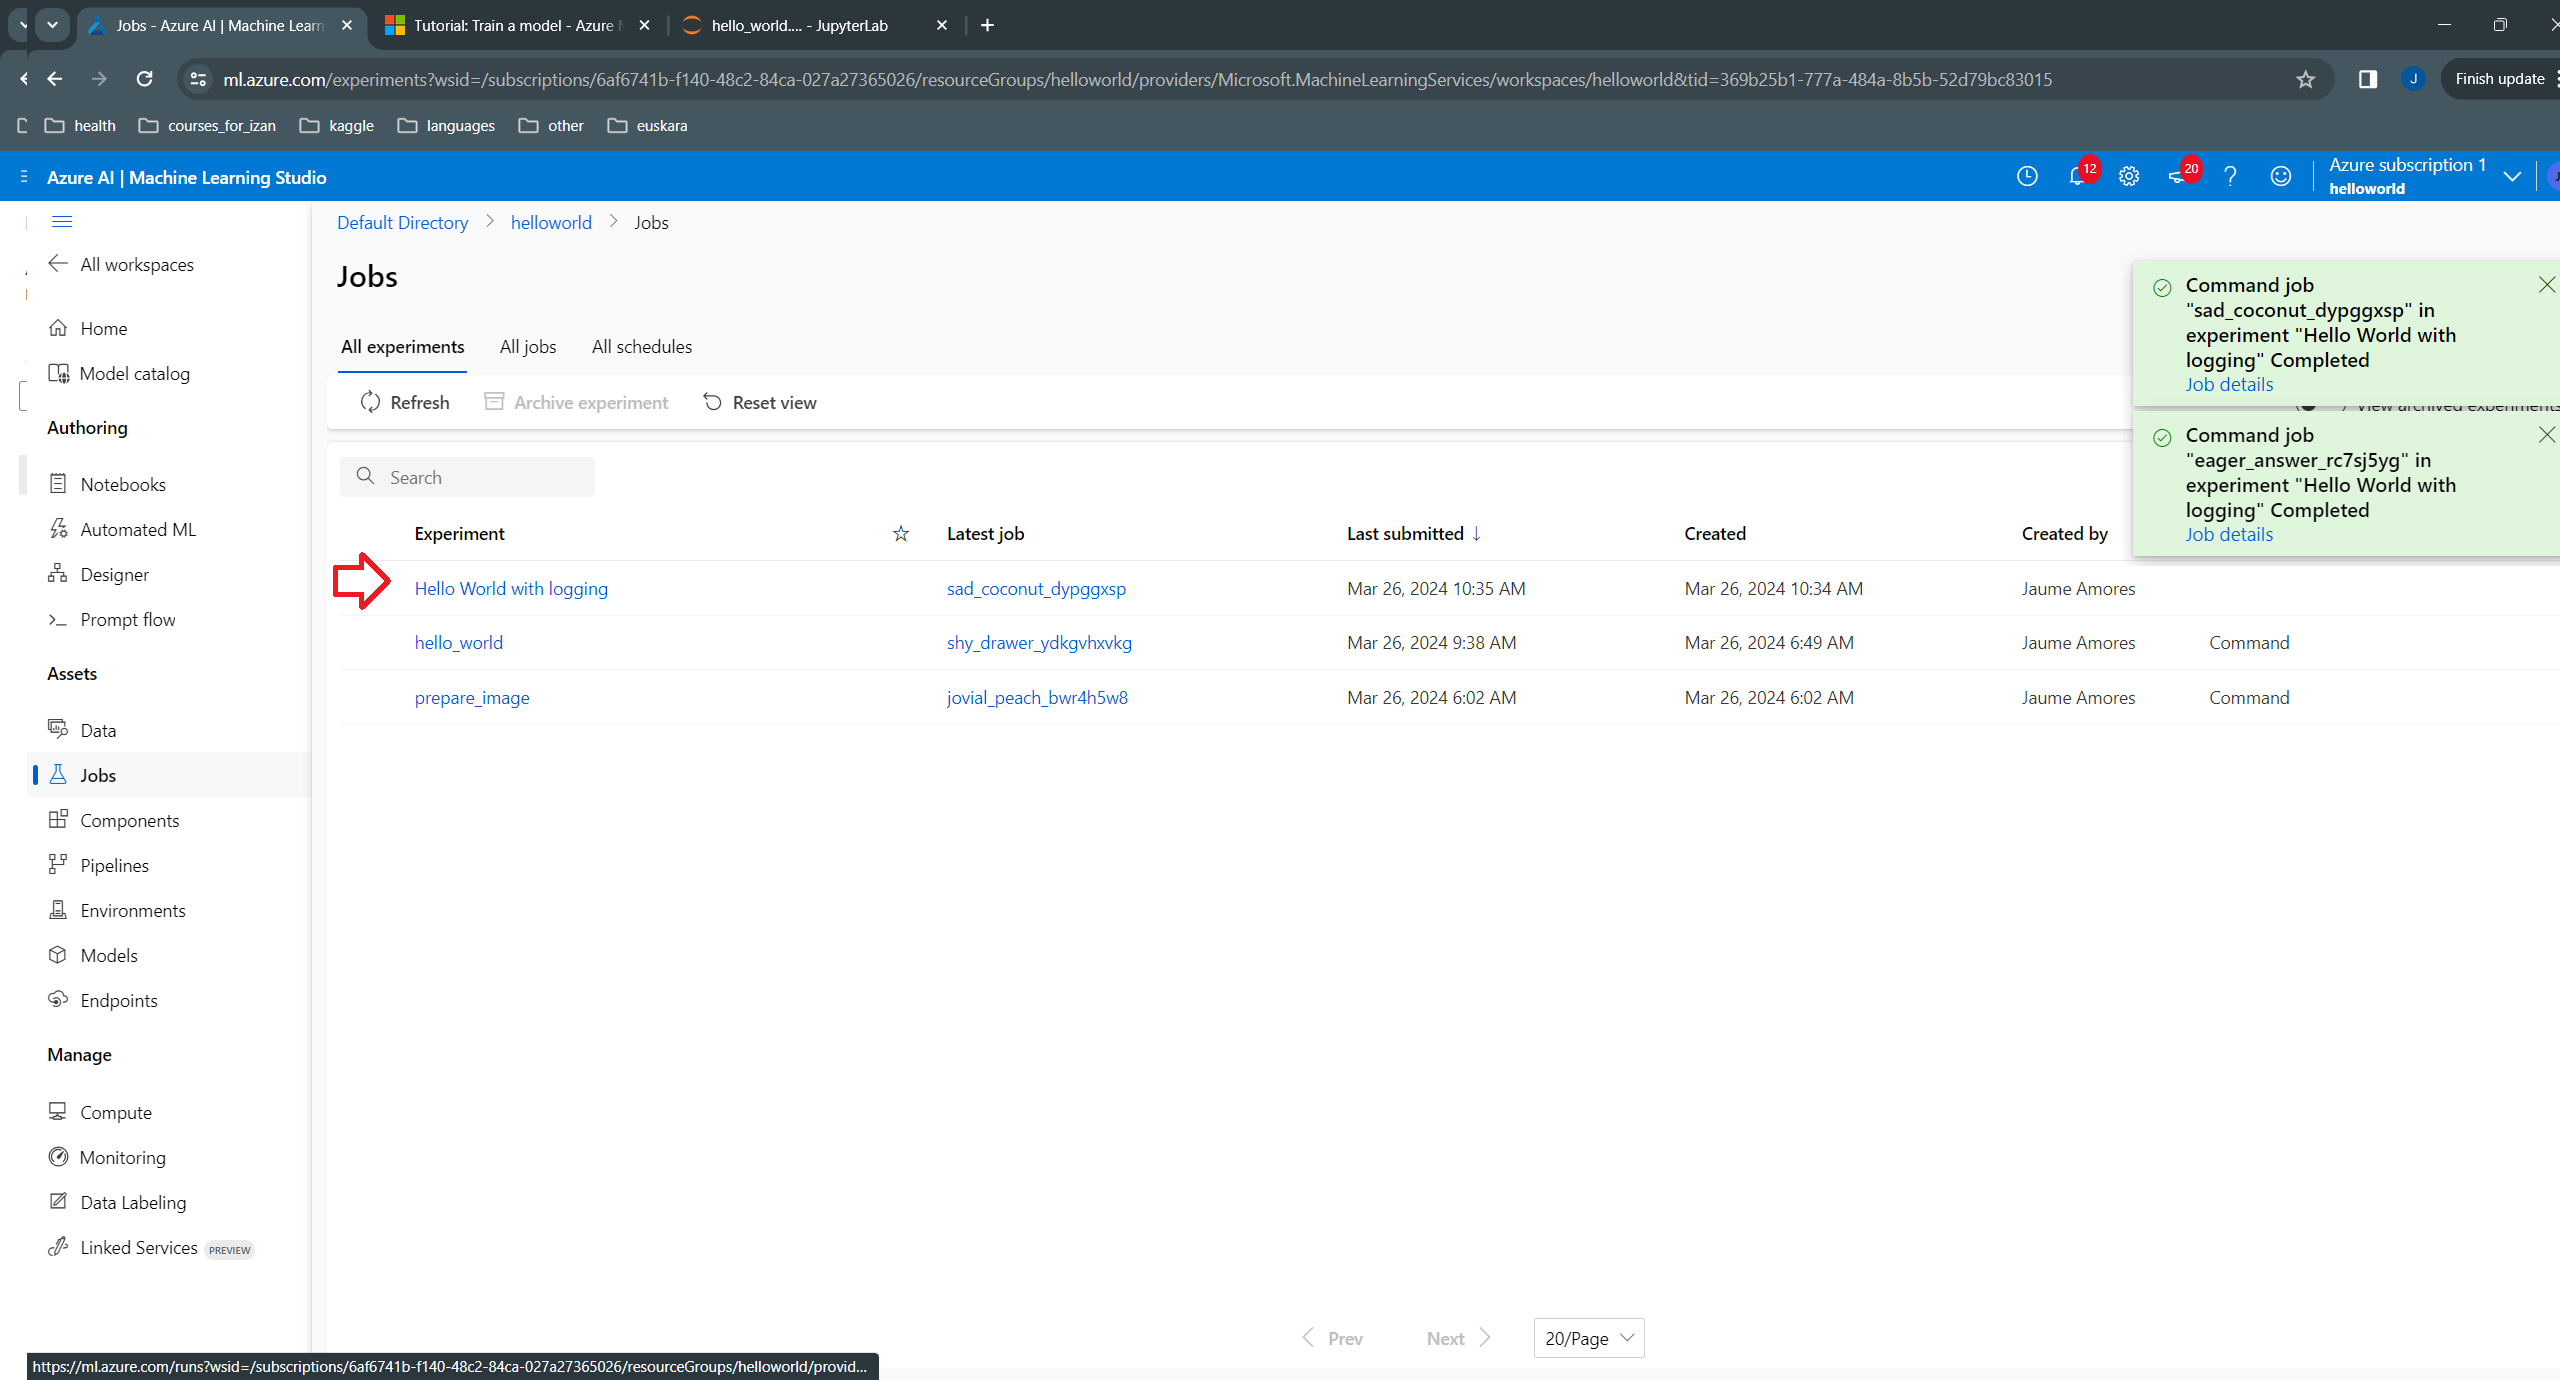

And the name passed as argument:

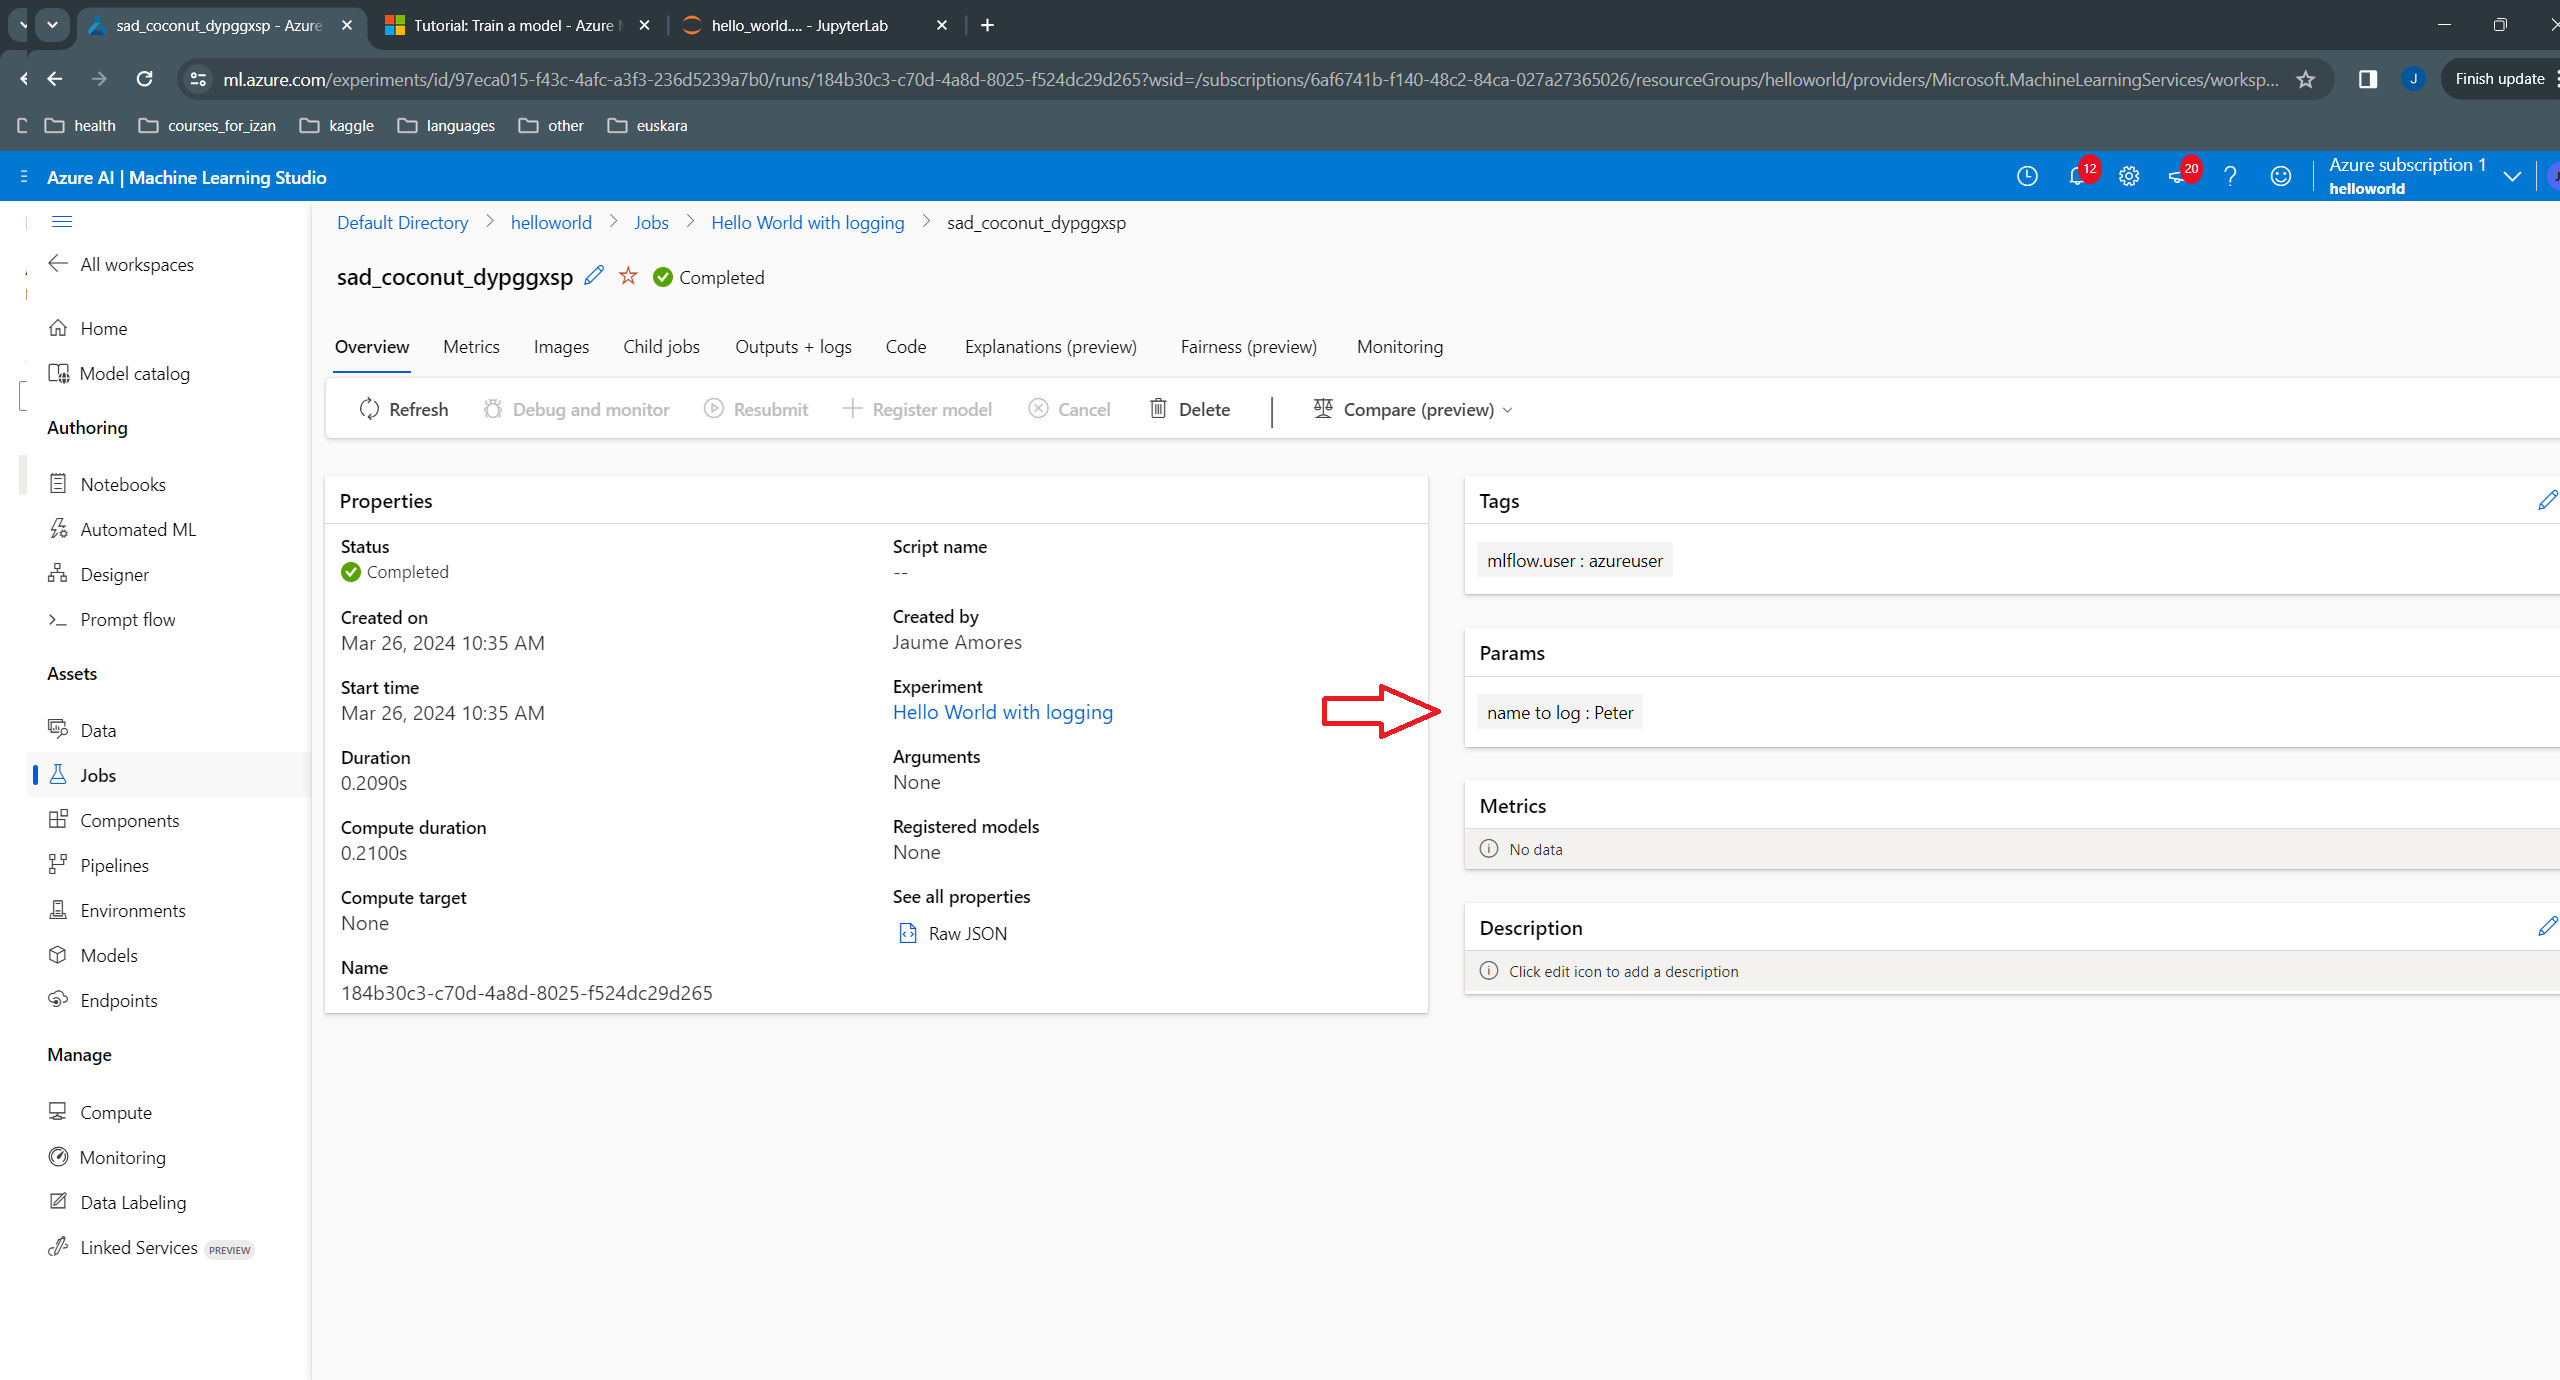

We start by getting a connection to our Azure ML (AML for short) workspace. We use here a simple connection mechanism that doesn't require writting your subscription, resource group and workspace details:

In [ ]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient.from_config (
    credential=credential
)

Found the config file in: /config.json


## Running script as a job

We now convert the previous script into a job that can be run from the UI. 

### Setting connection

For the remaining part of this tutorial, we will be needing an `ml_client` handle. This will allow us to create and use resources from our workspace. The simplest way to get such handle is with the following code:

In [ ]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient.from_config (
    credential=credential
)

Found the config file in: /config.json


### Specifying and submitting job

We specify a job using the `command` decorator:

In [ ]:
from azure.ai.ml import command

job = command(
    inputs=dict(
        name="Jaume", # default value of our parameter
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_core.py --name ${{inputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Simplest Hello World",
)

> Note: we indicate as environment "AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest", which actually contains more libraries than we need, such as sklearn. Simpler environments to use can be found in the "Environments" section of the workspace.

... and submit it using `create_or_update` from `ml_client`:

In [ ]:
ml_client.create_or_update(job)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Uploading hello_world (8.59 MBs): 100%

Experiment,Name,Type,Status,Details Page
hello_world,clever_spade_sq4jwcg67r,command,Starting,Link to Azure Machine Learning studio


In the link that appears, we can see the status of the job, which initially is "Queued". We need to wait until it is completed (and refresh the page to see this). Once it is completed, we can look at the logs:

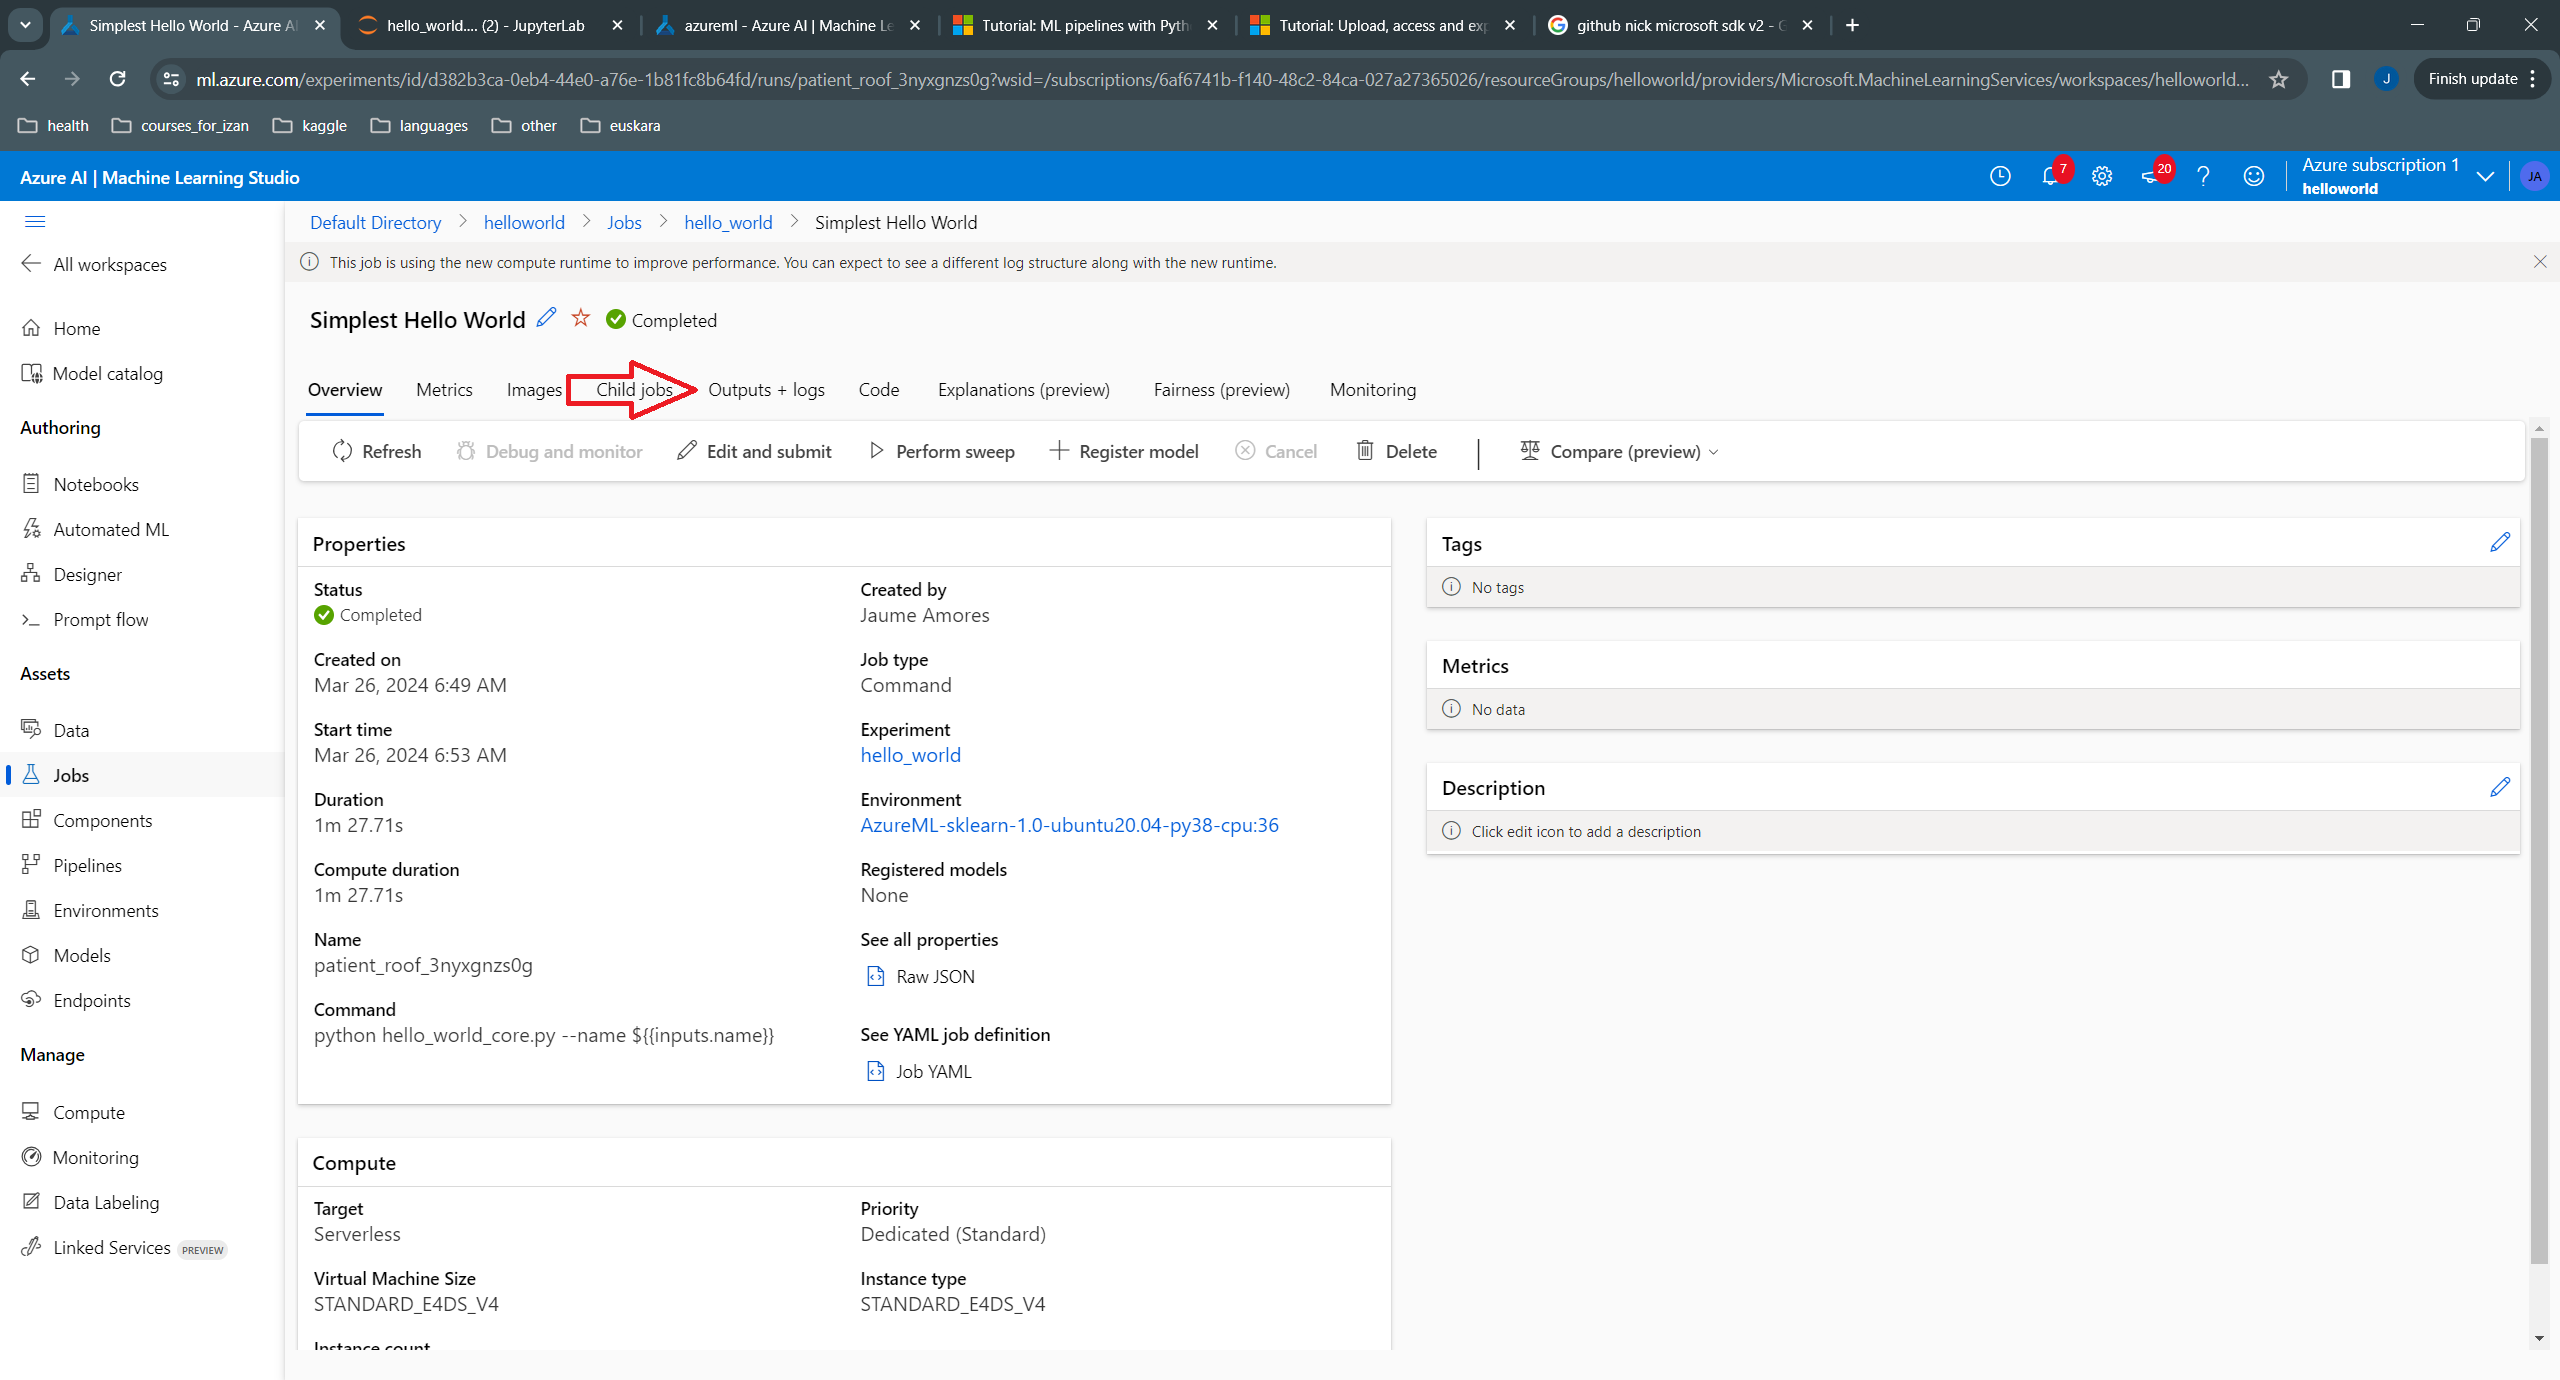

In the logs, we can see the messages printed in console:

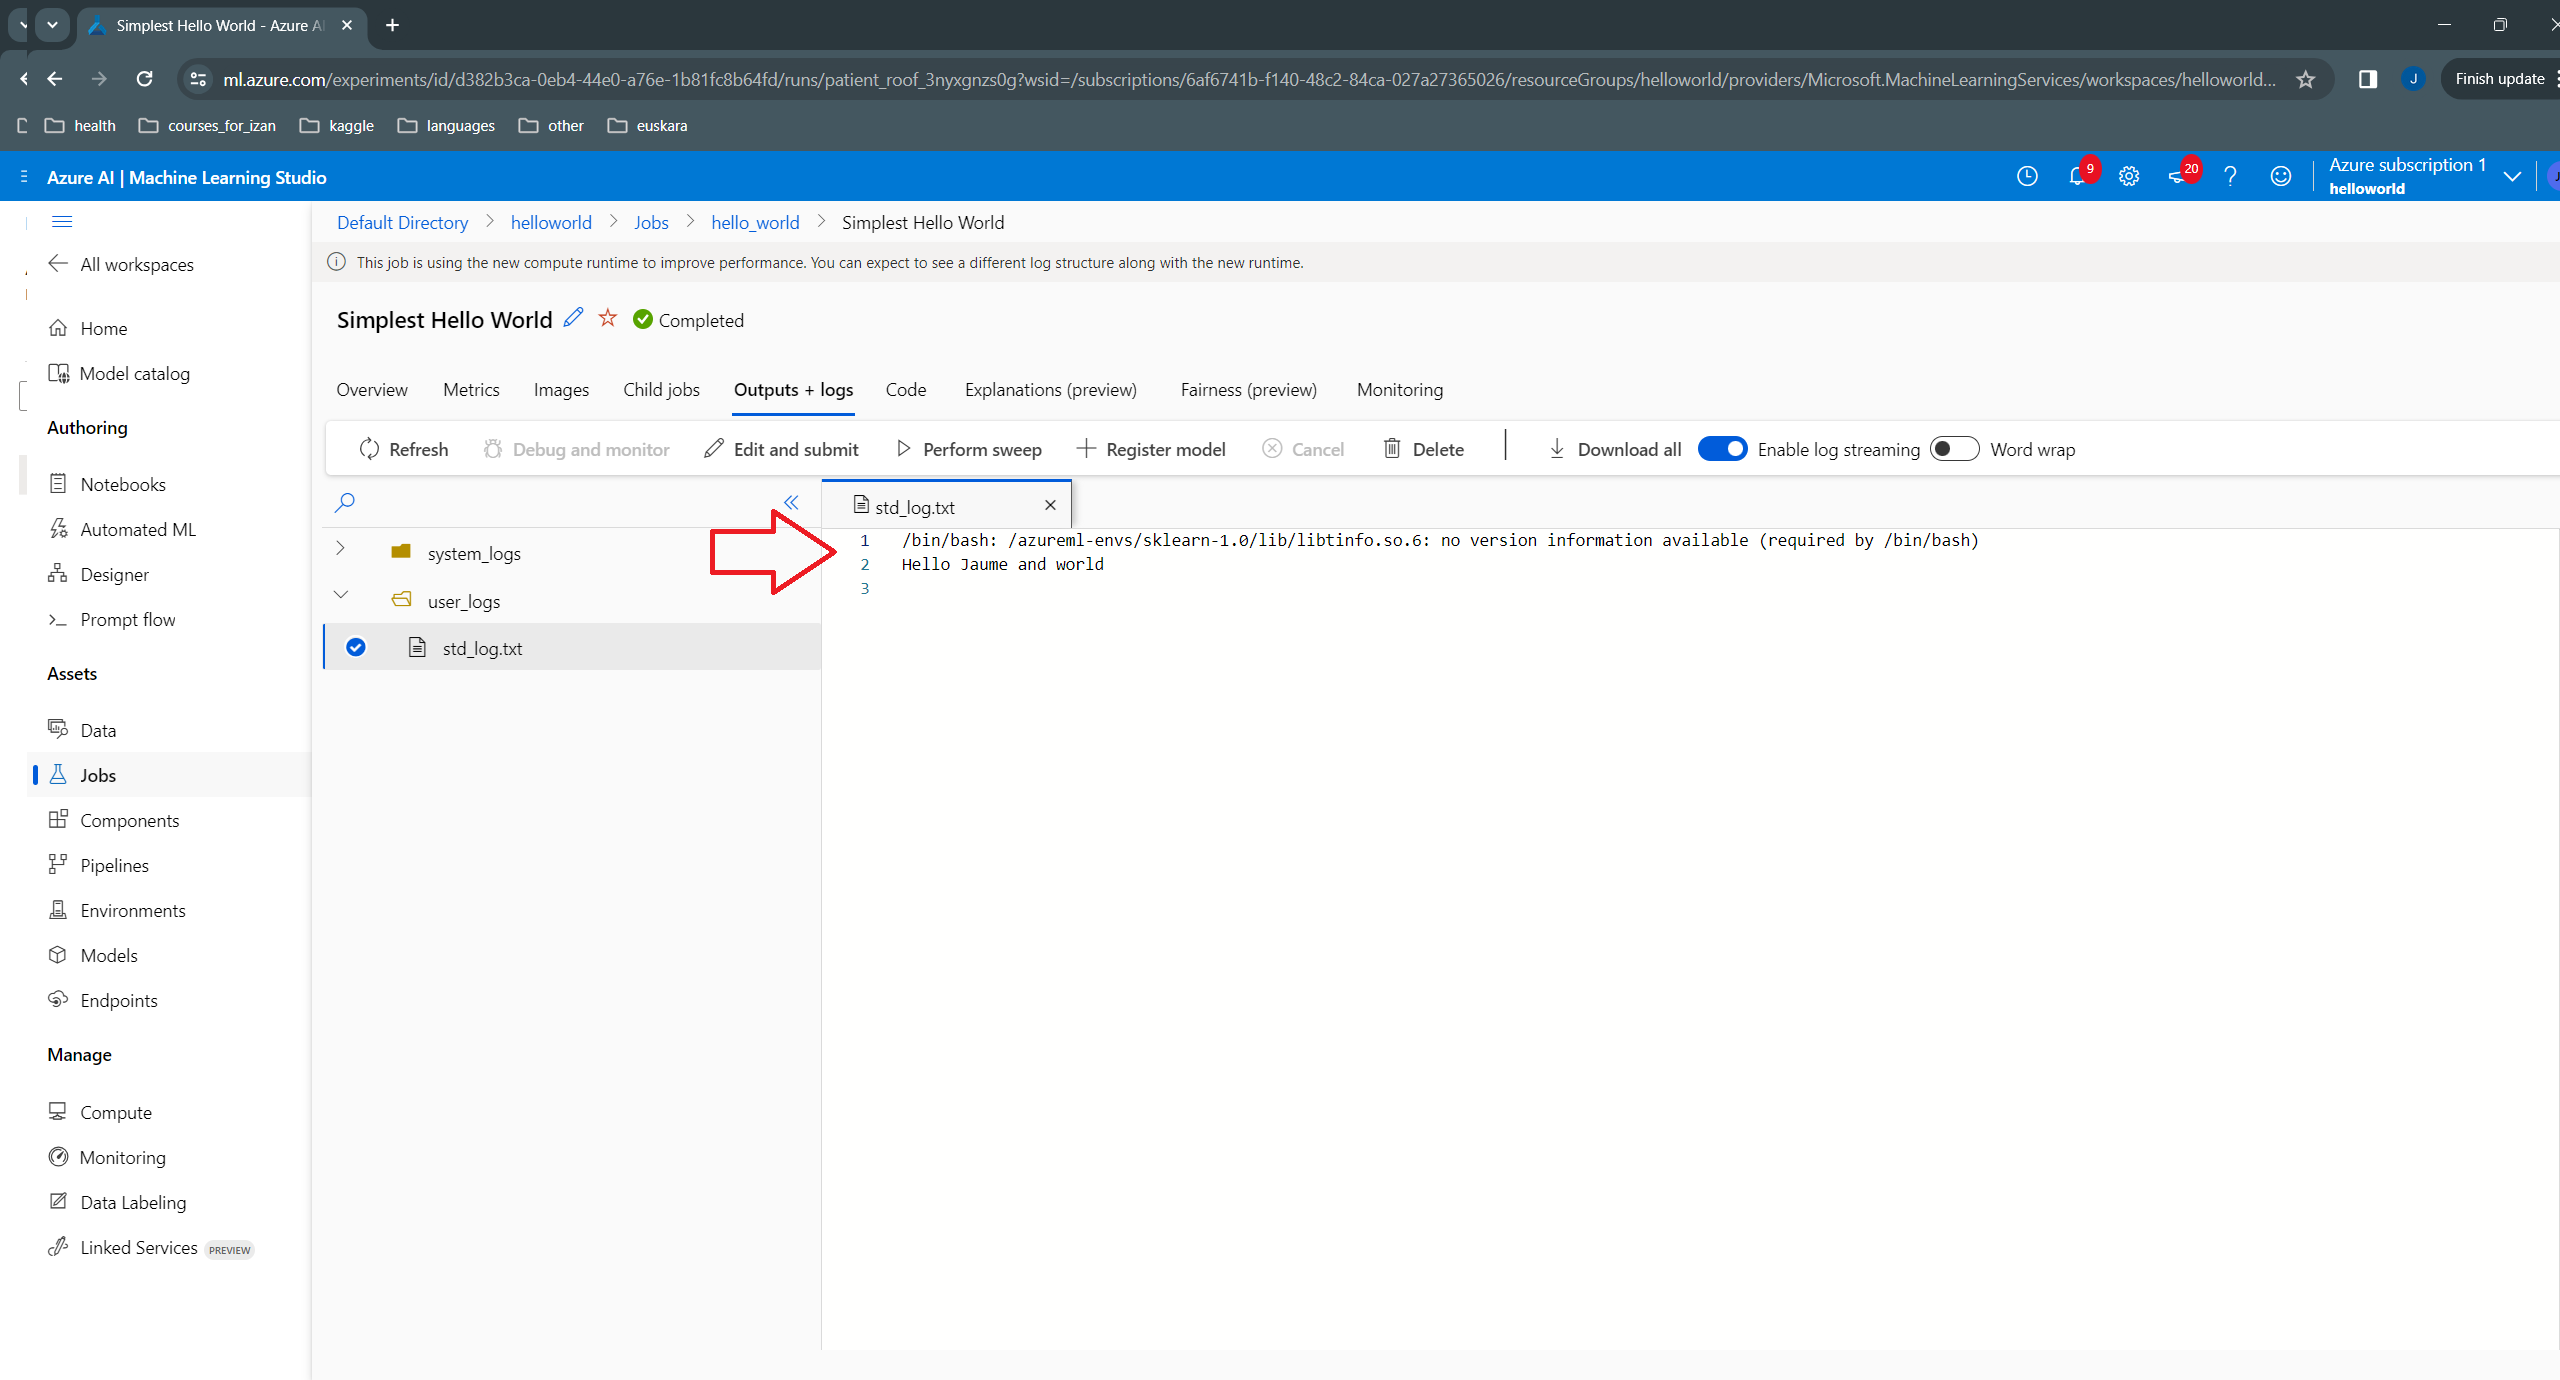

### Changing the input 

Above, we indicated a default value for the input argument `name`. It would be good to be able to submit jobs with different values for that argument. One way to do that is:

- In the job's *Overview* tab, click on "Edit and submit"

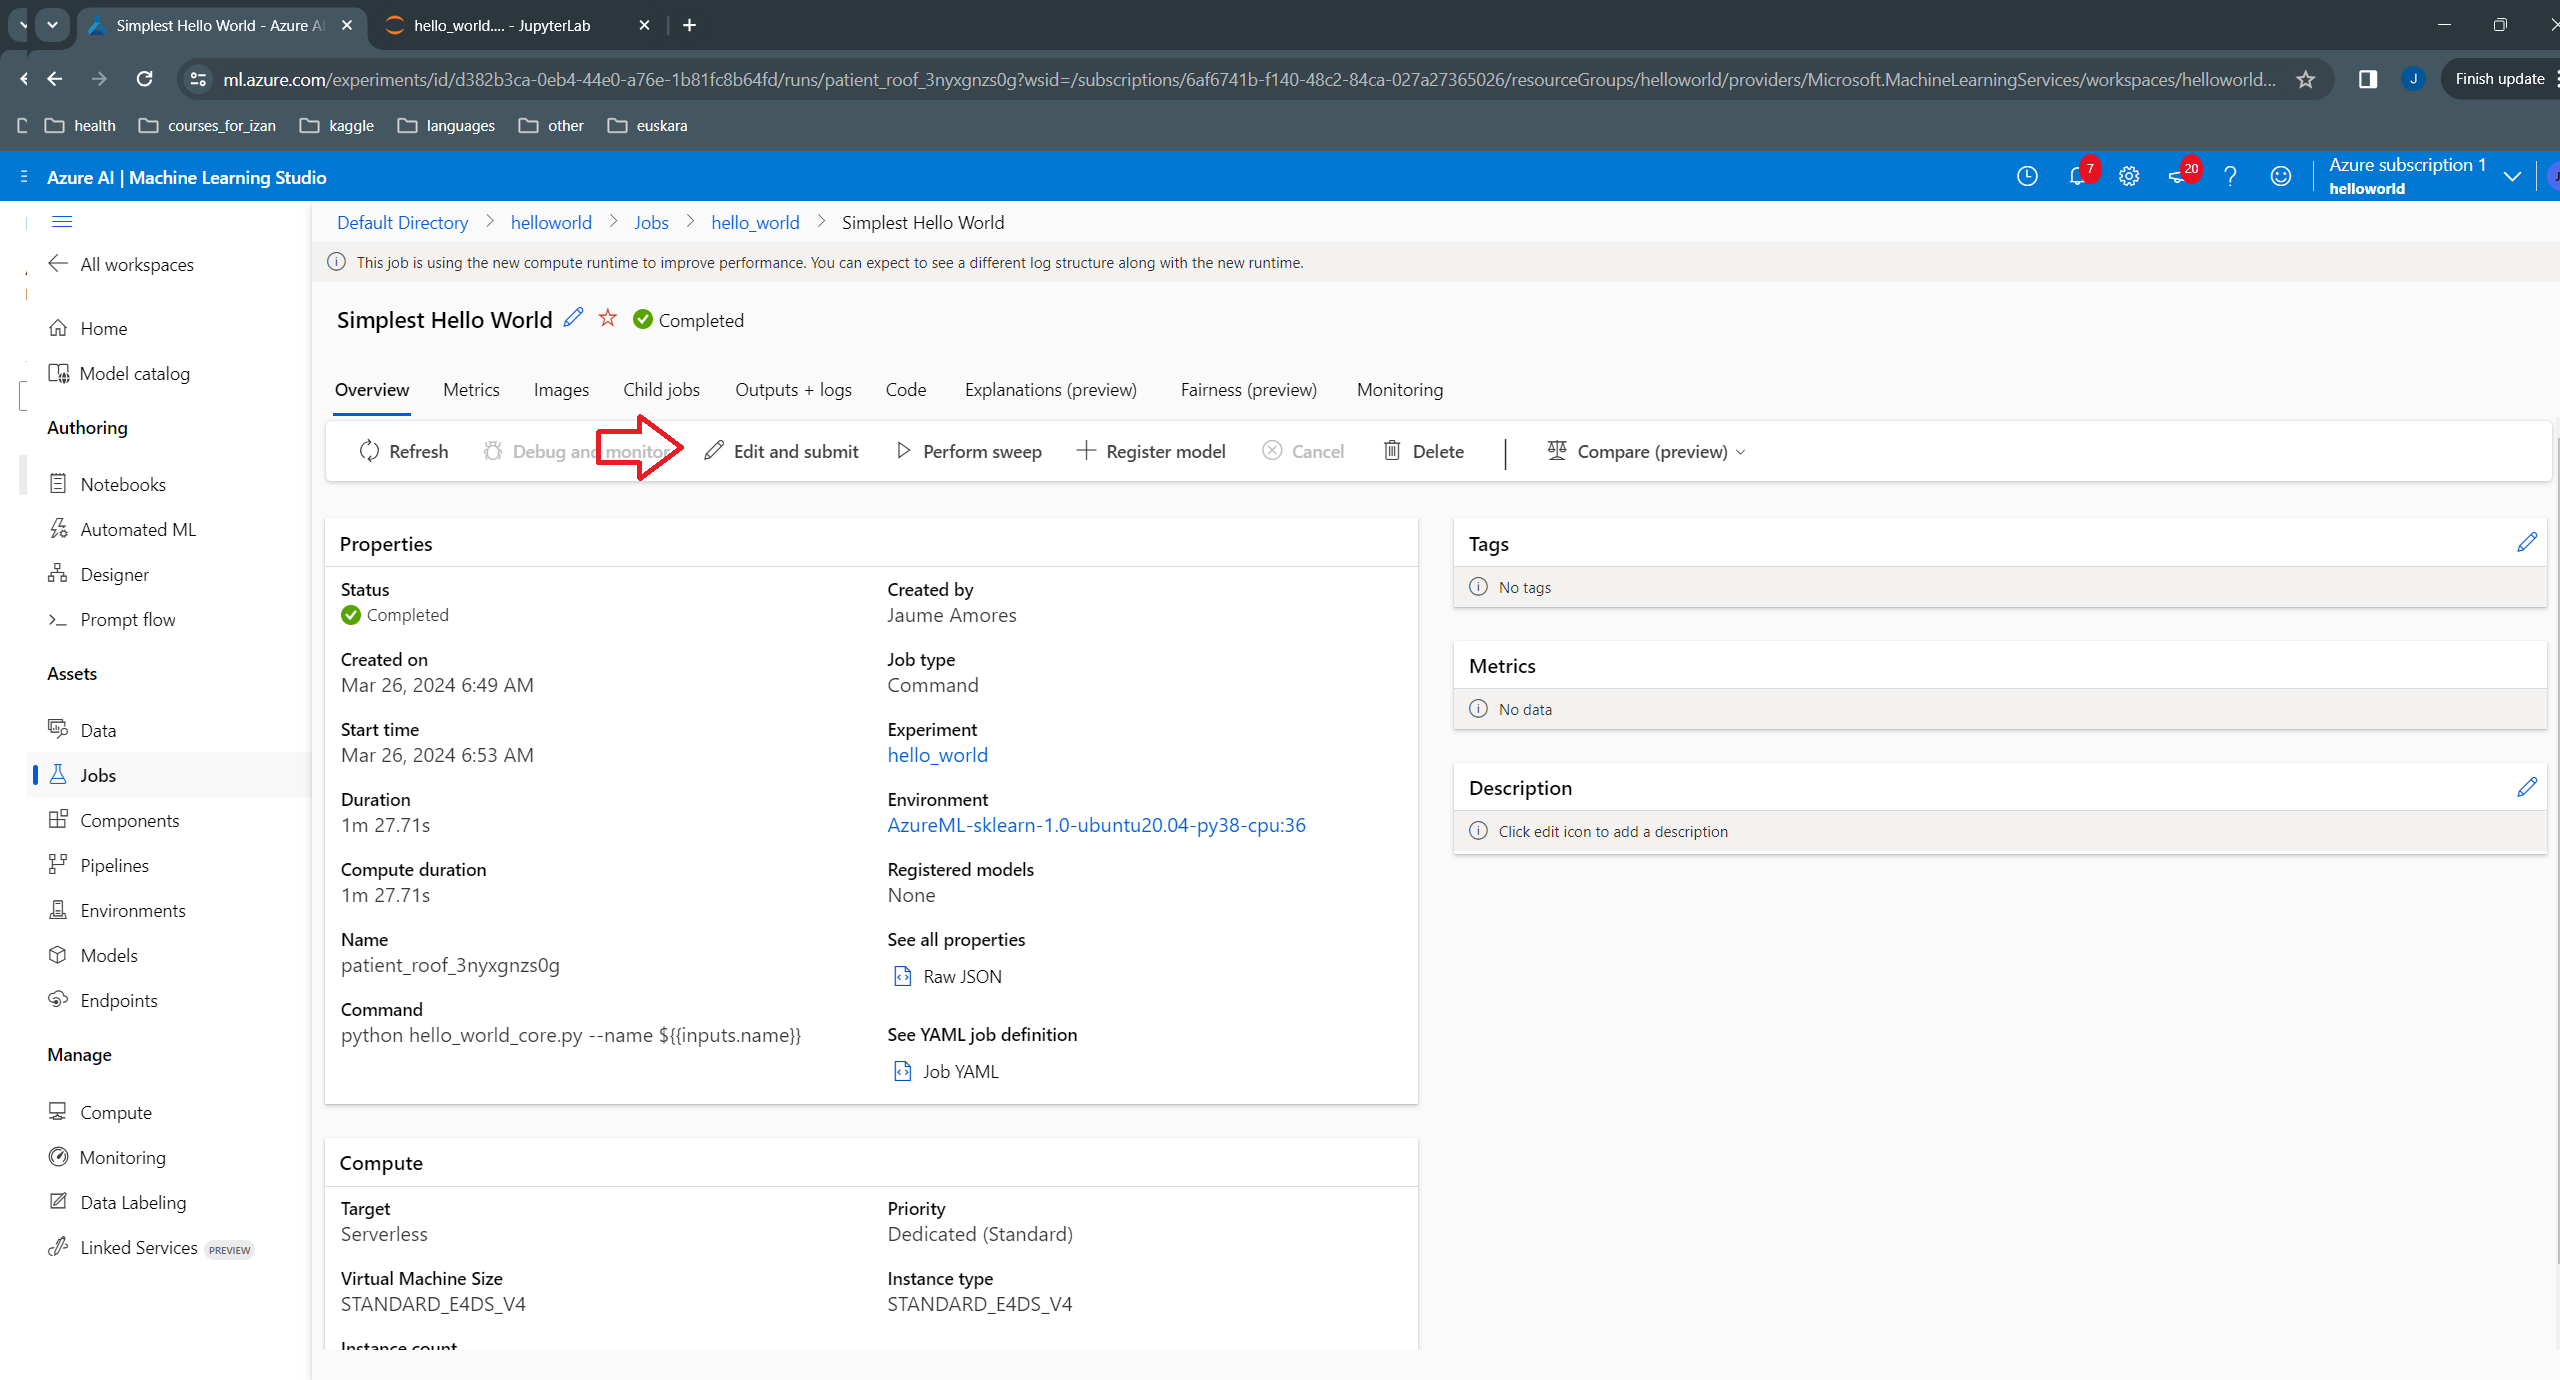

- In the "Training script" section, edit the "Inputs" by clicking on the pencil next to it:

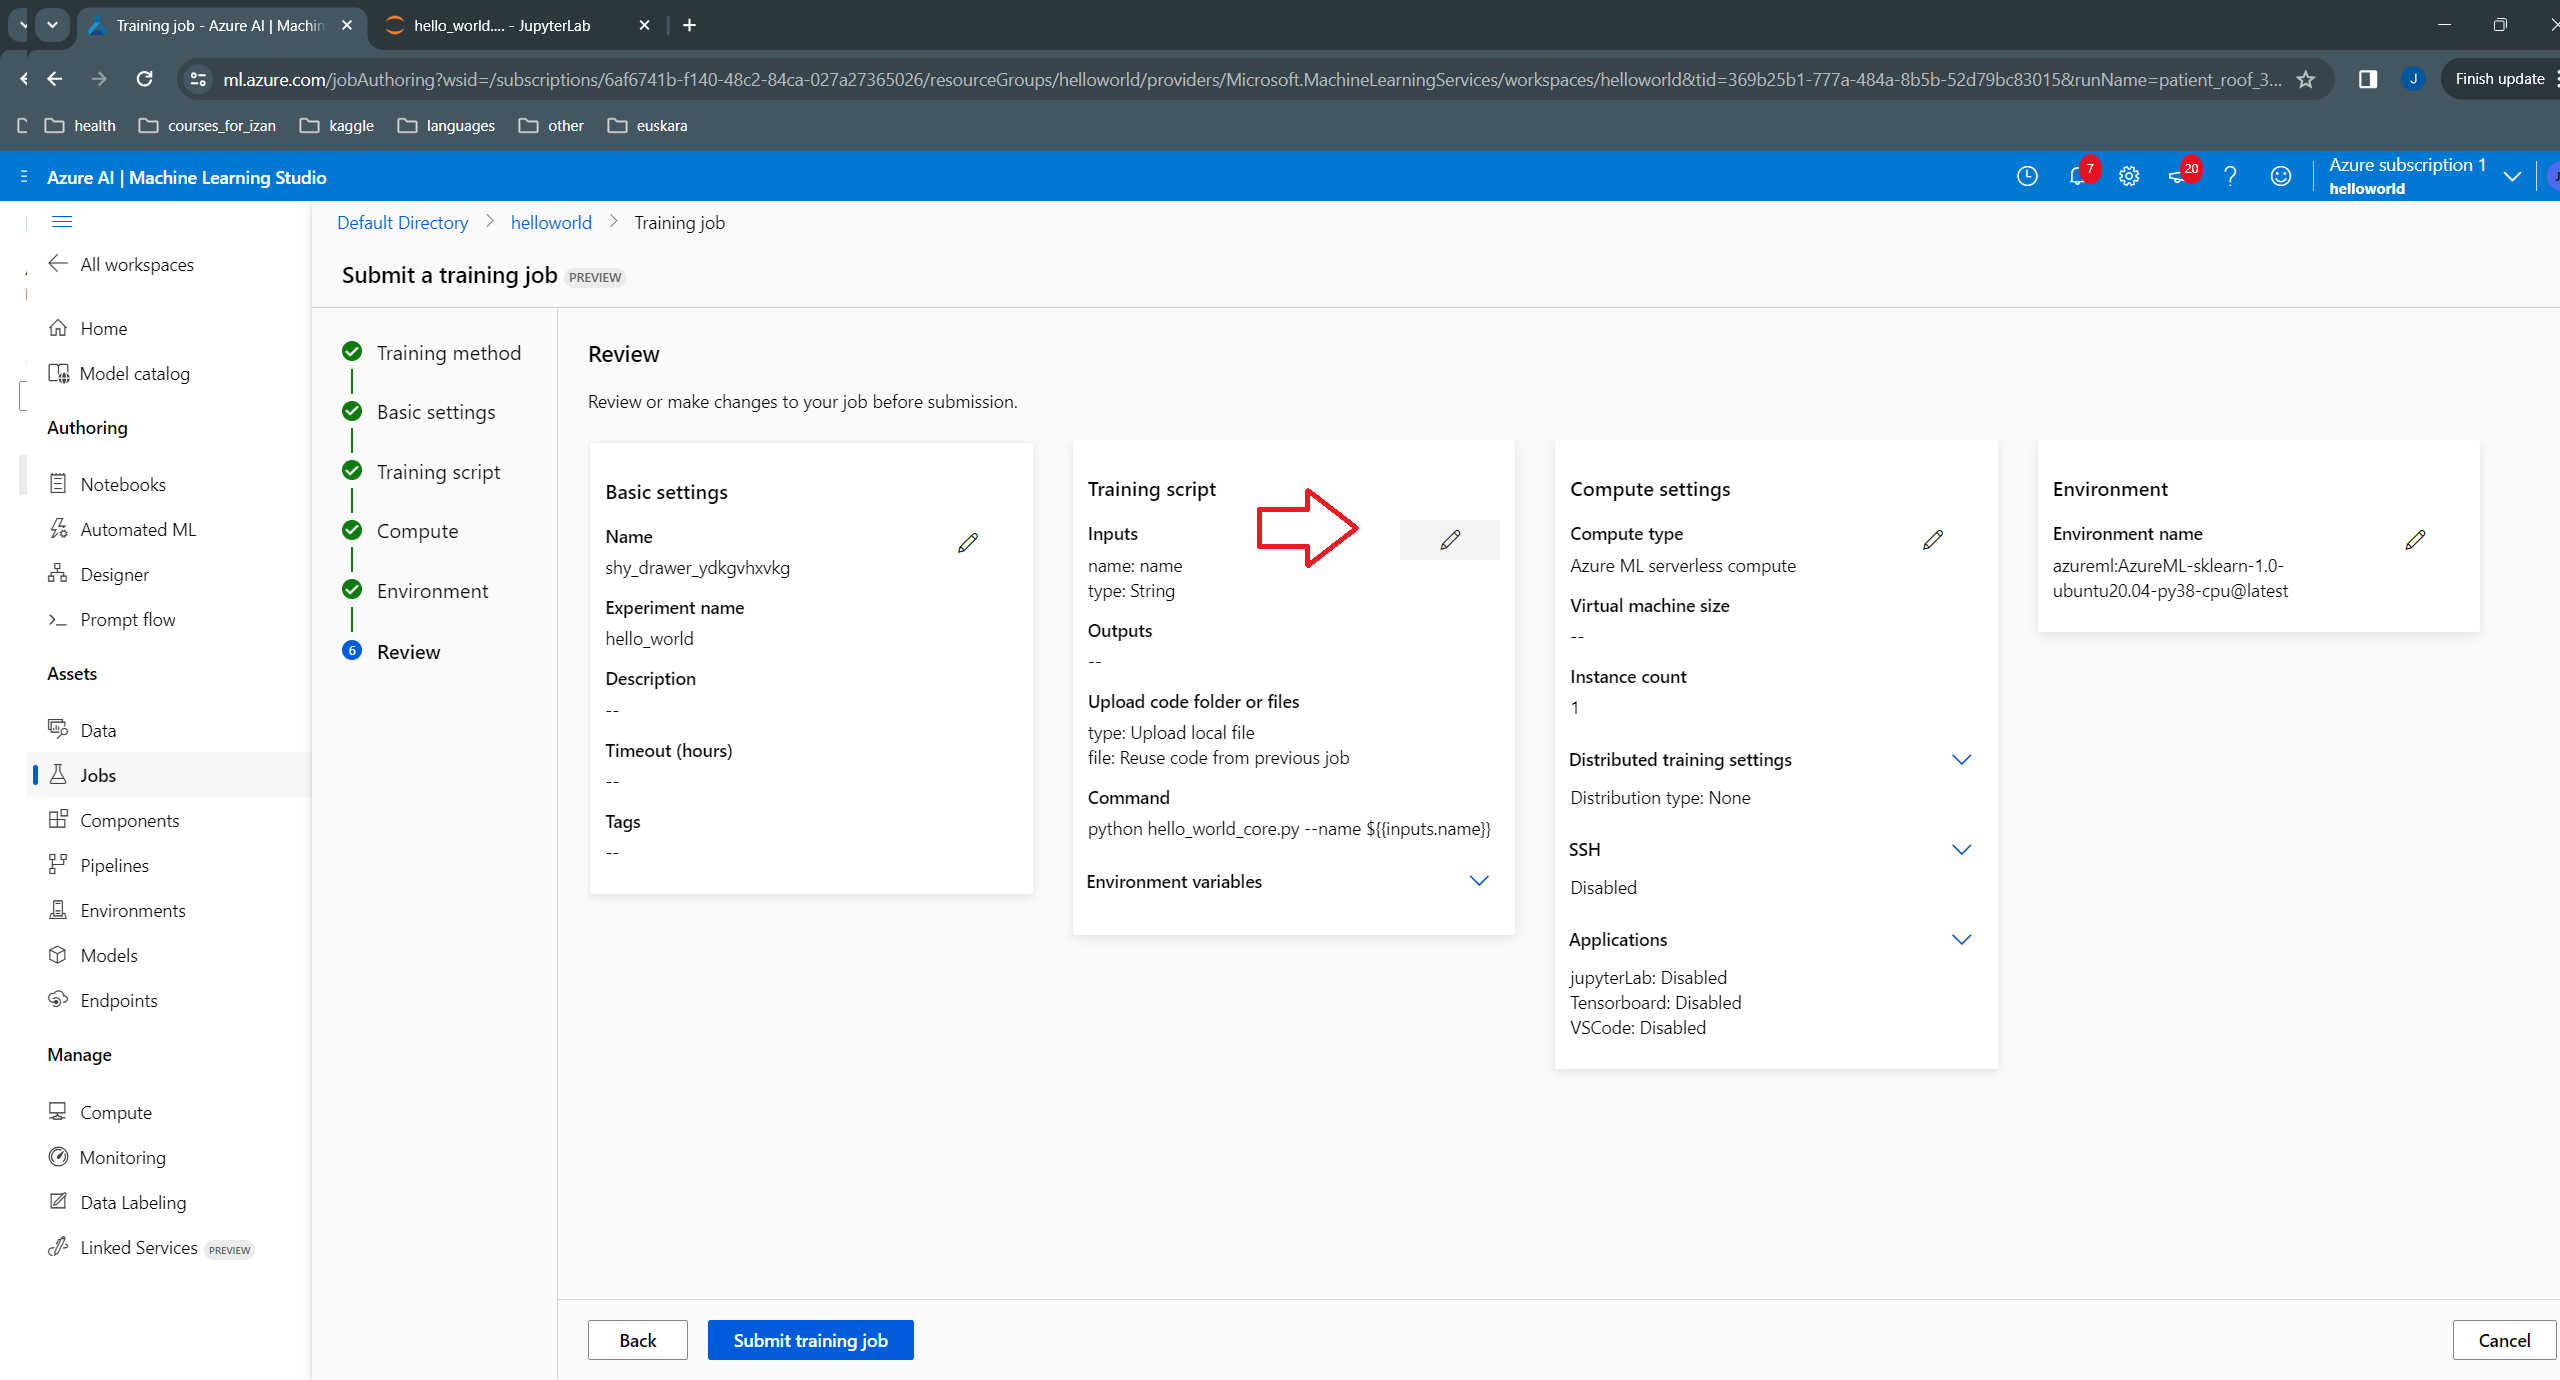

- In the "Input value" field, type the new value you want for the argument:

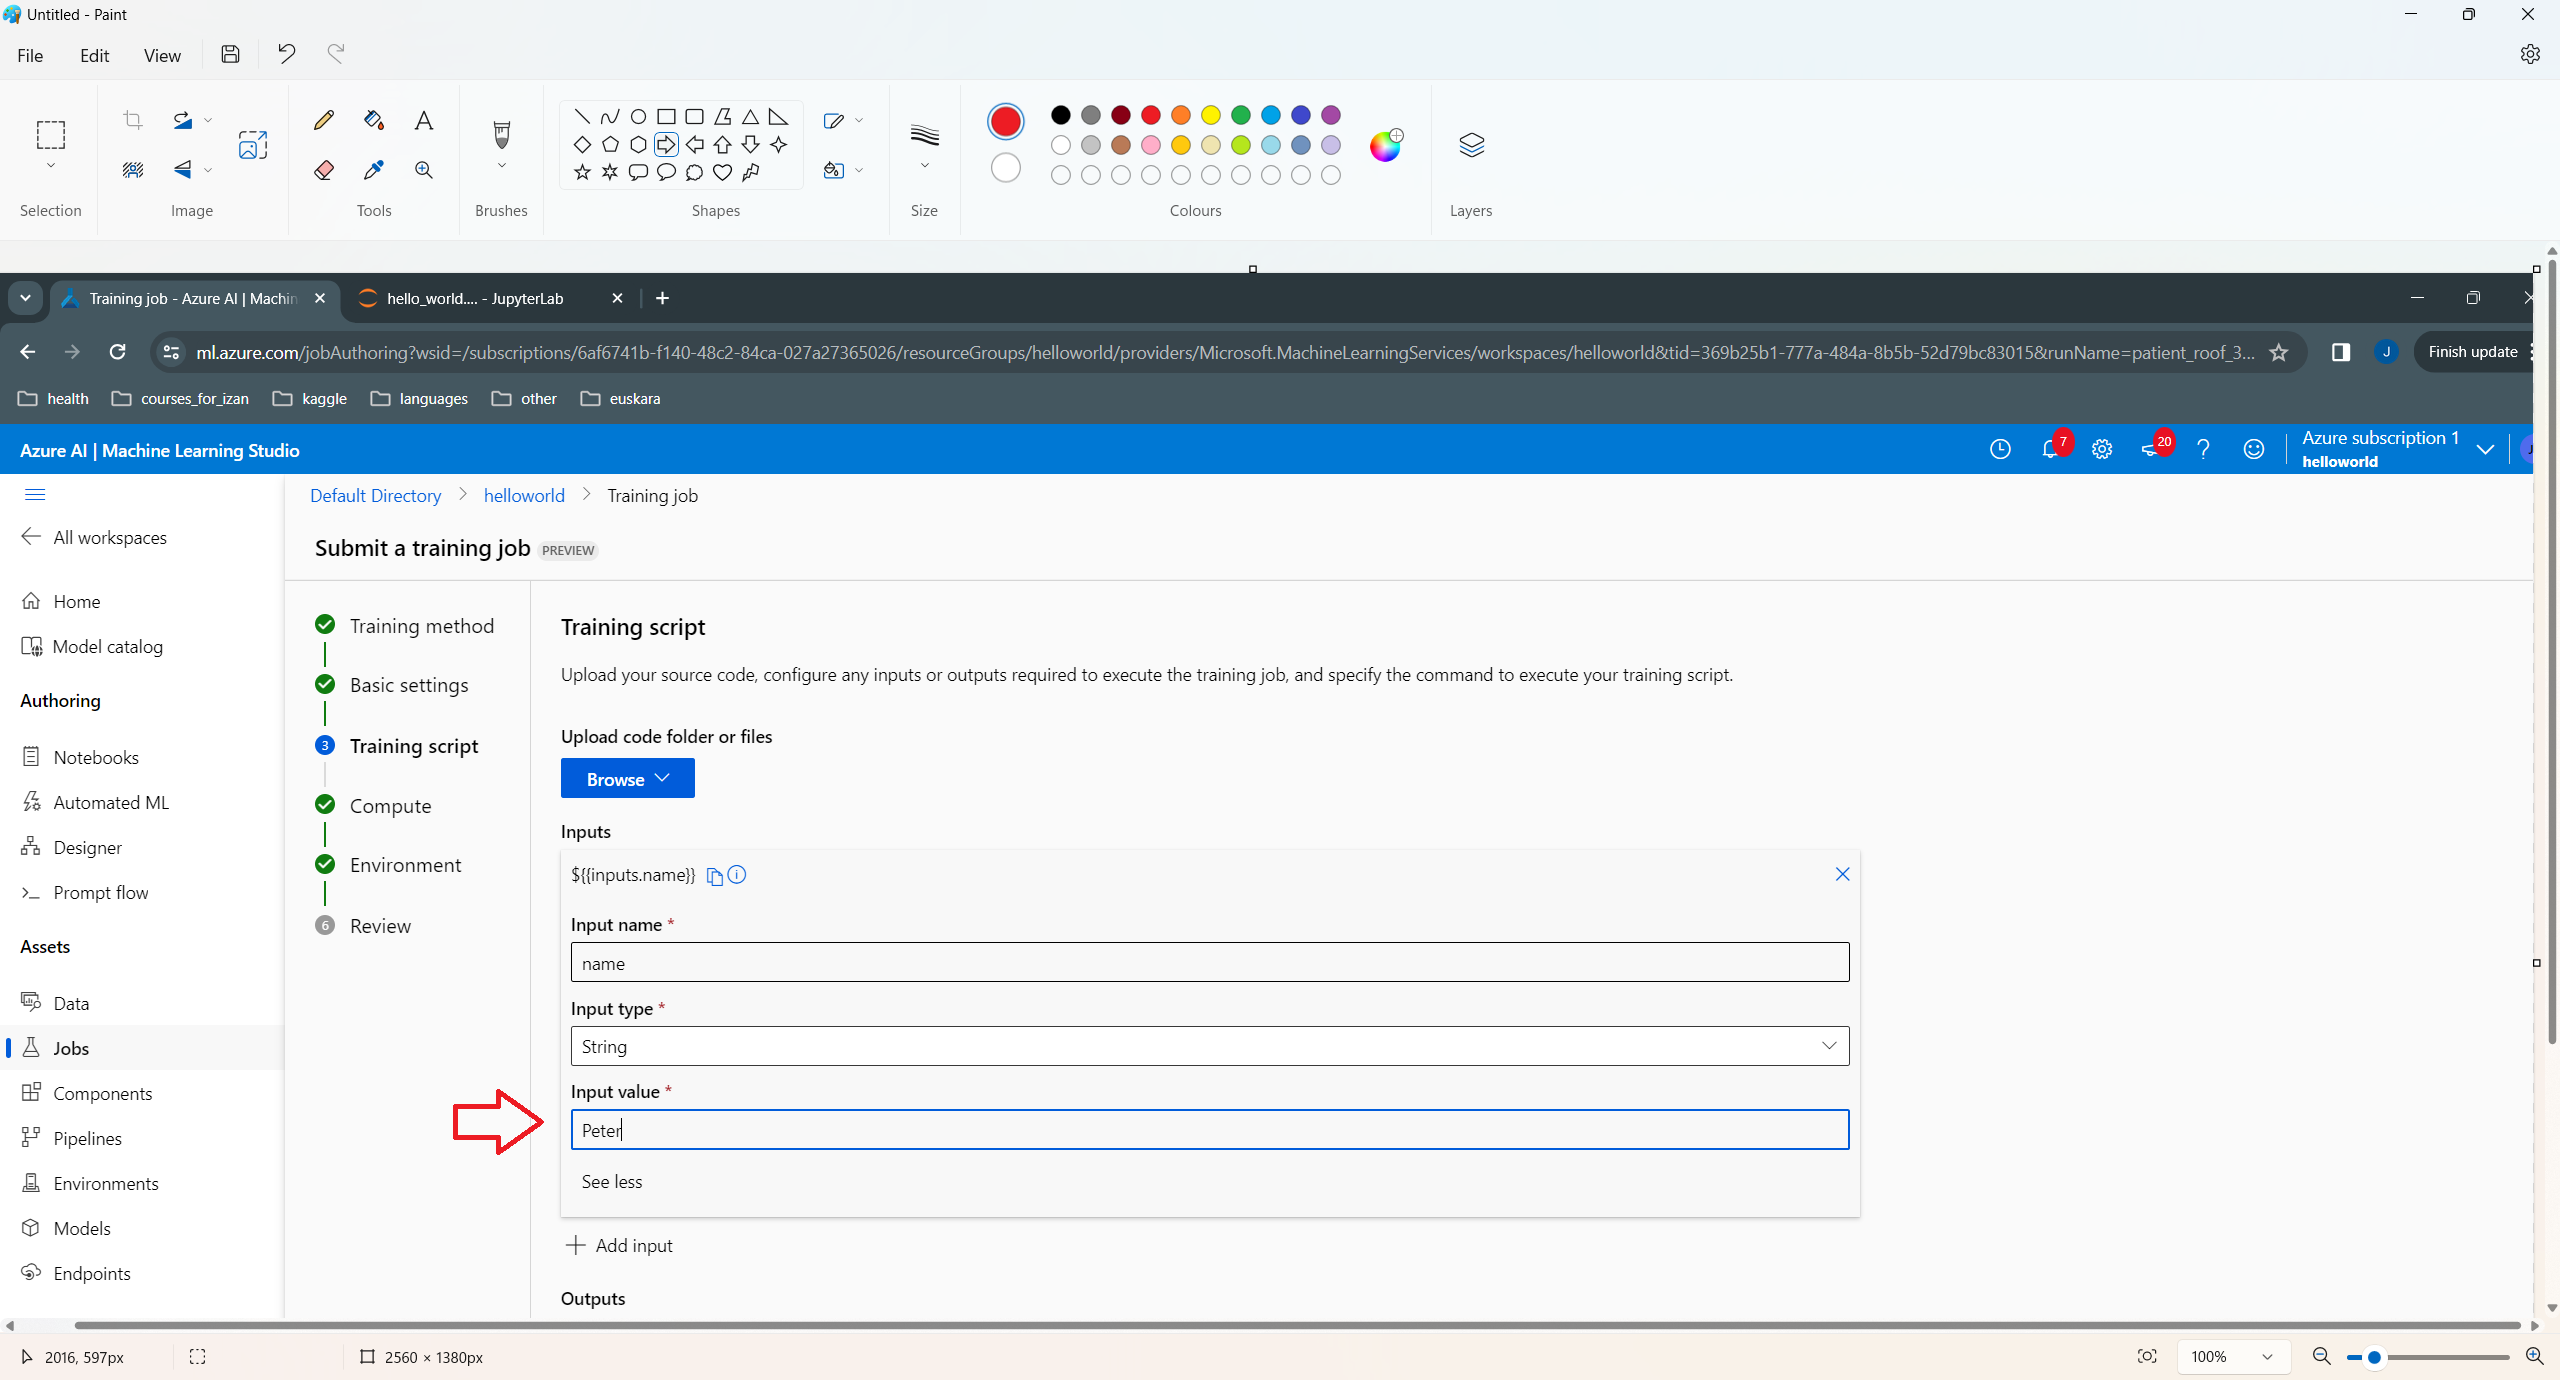

- Hit Next several times and then Submit.

- If we go to the jobs section of the workspace, and enter again our job ("helloworld"), we can see that a new job has been submitted:

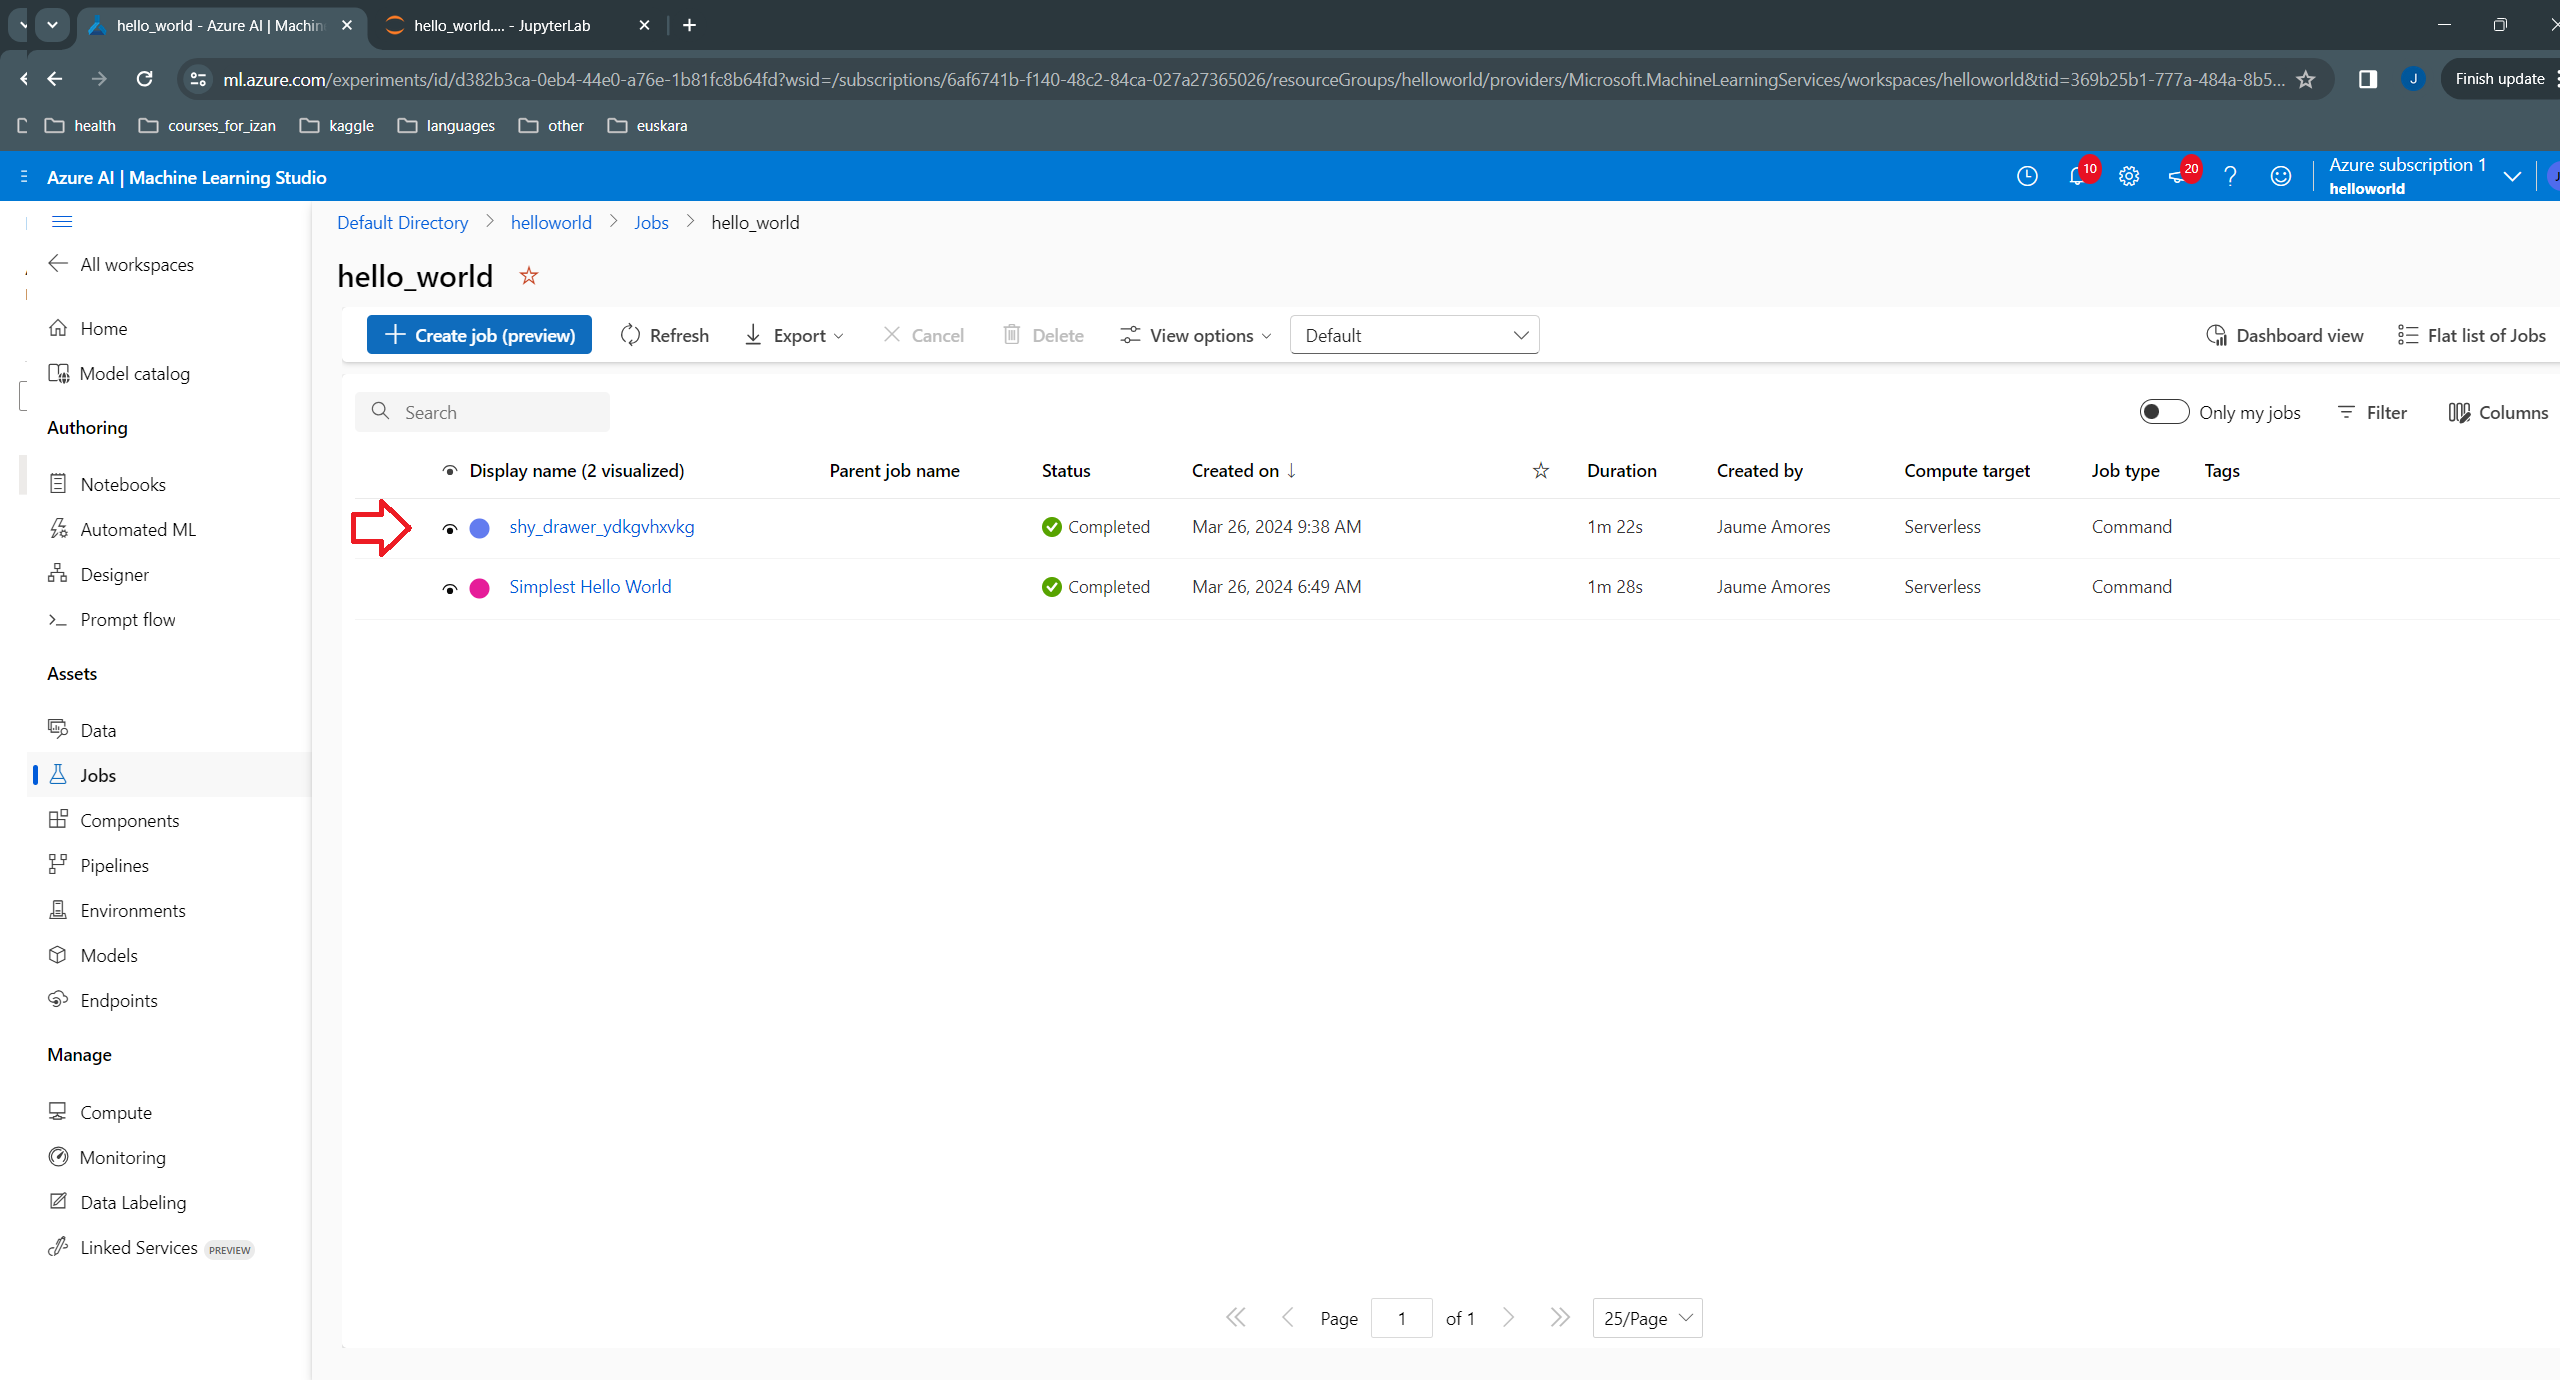

In its Overview tab, under "See all properties", we can inspect the json file:

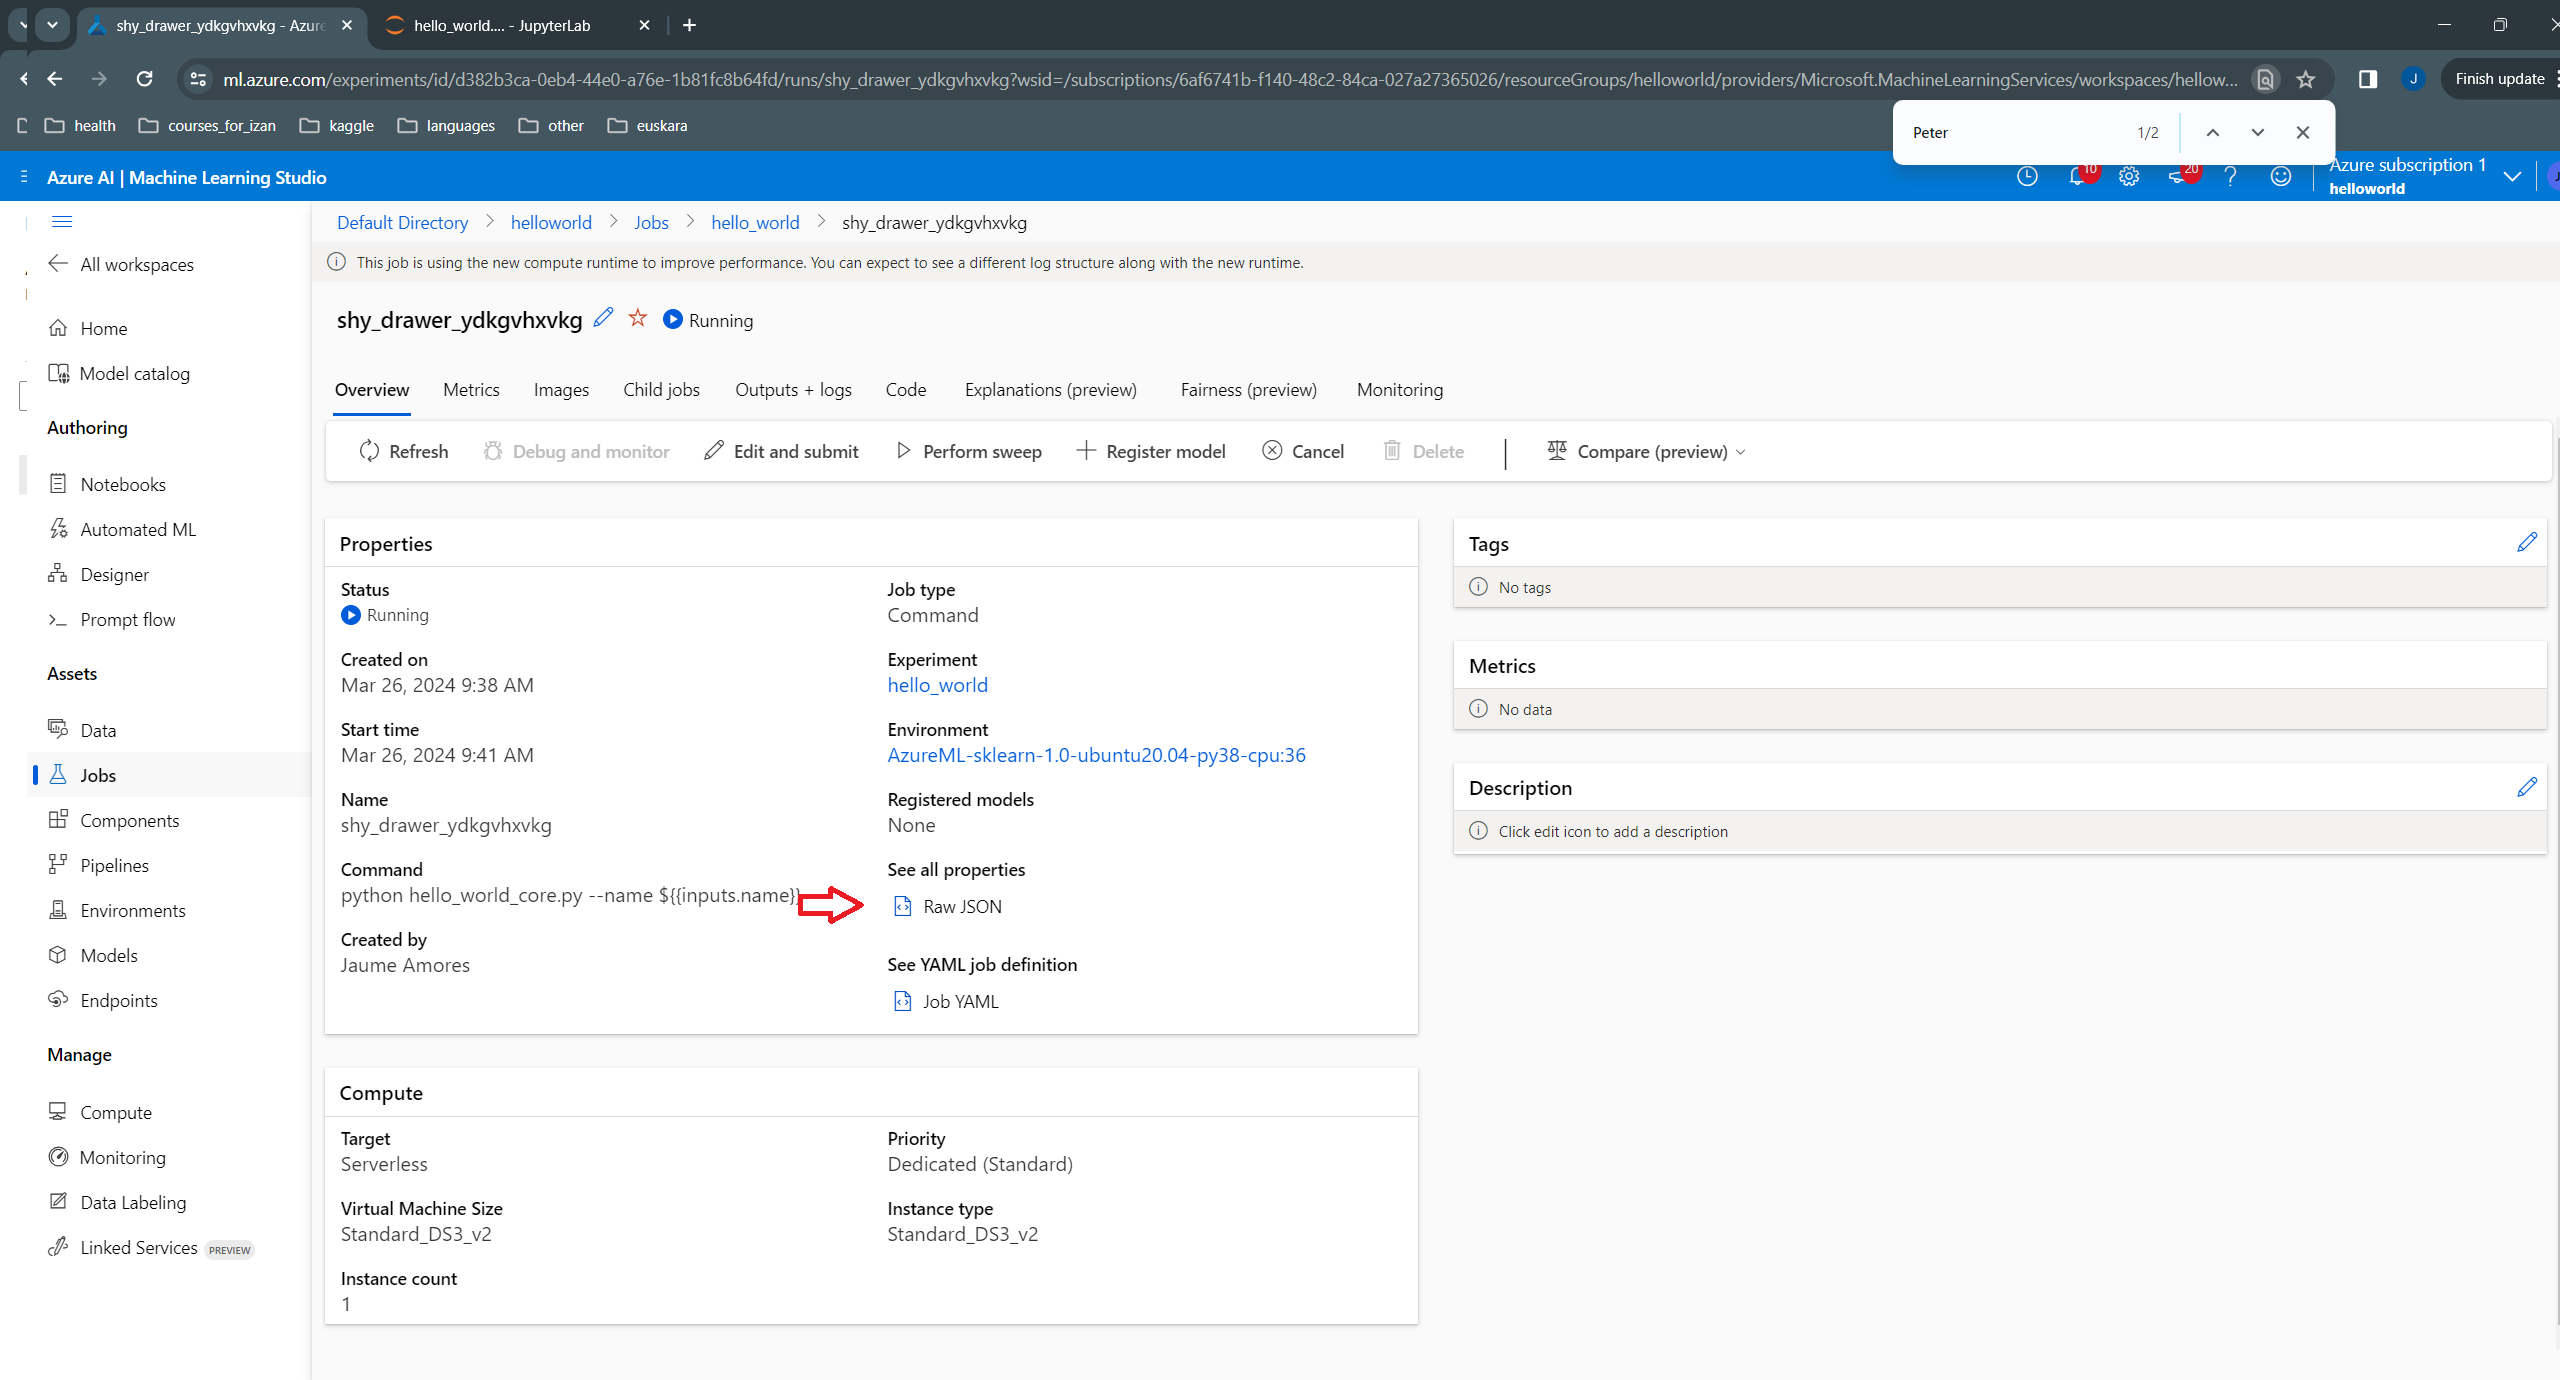

 ... and see that the new value (Peter) is used in its "parameters" dictionary:

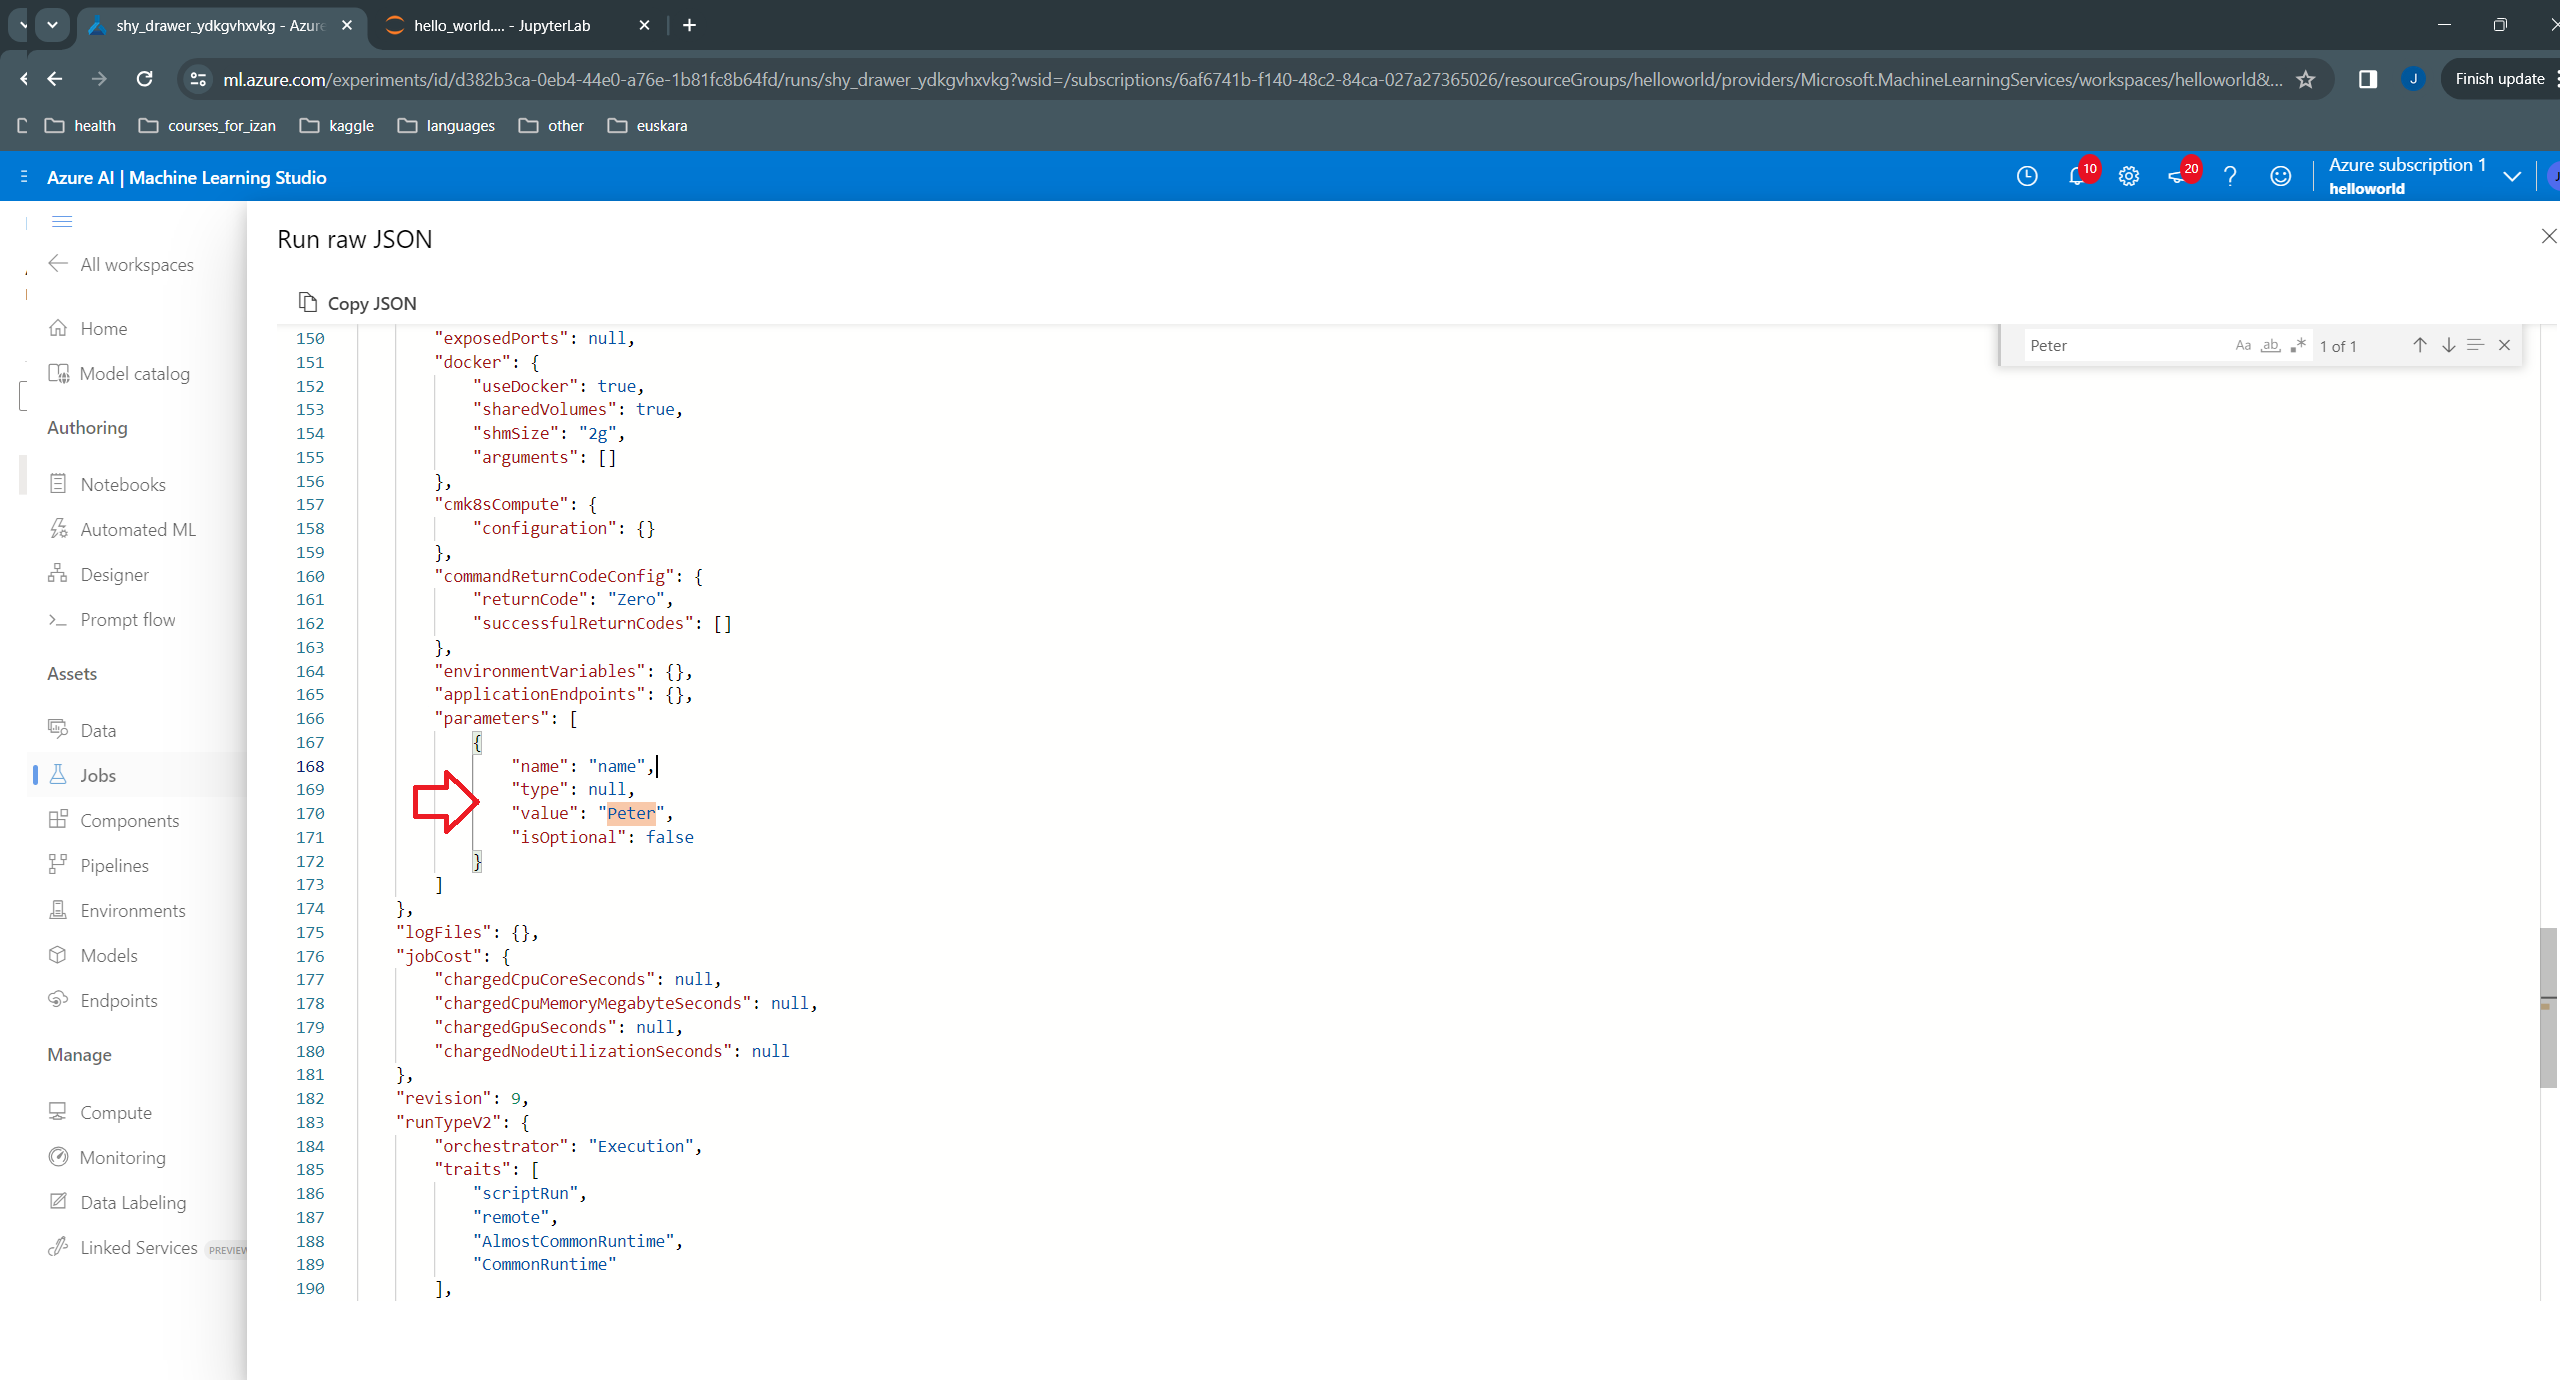

The std_log.txt for this job shows the new message with Peter:

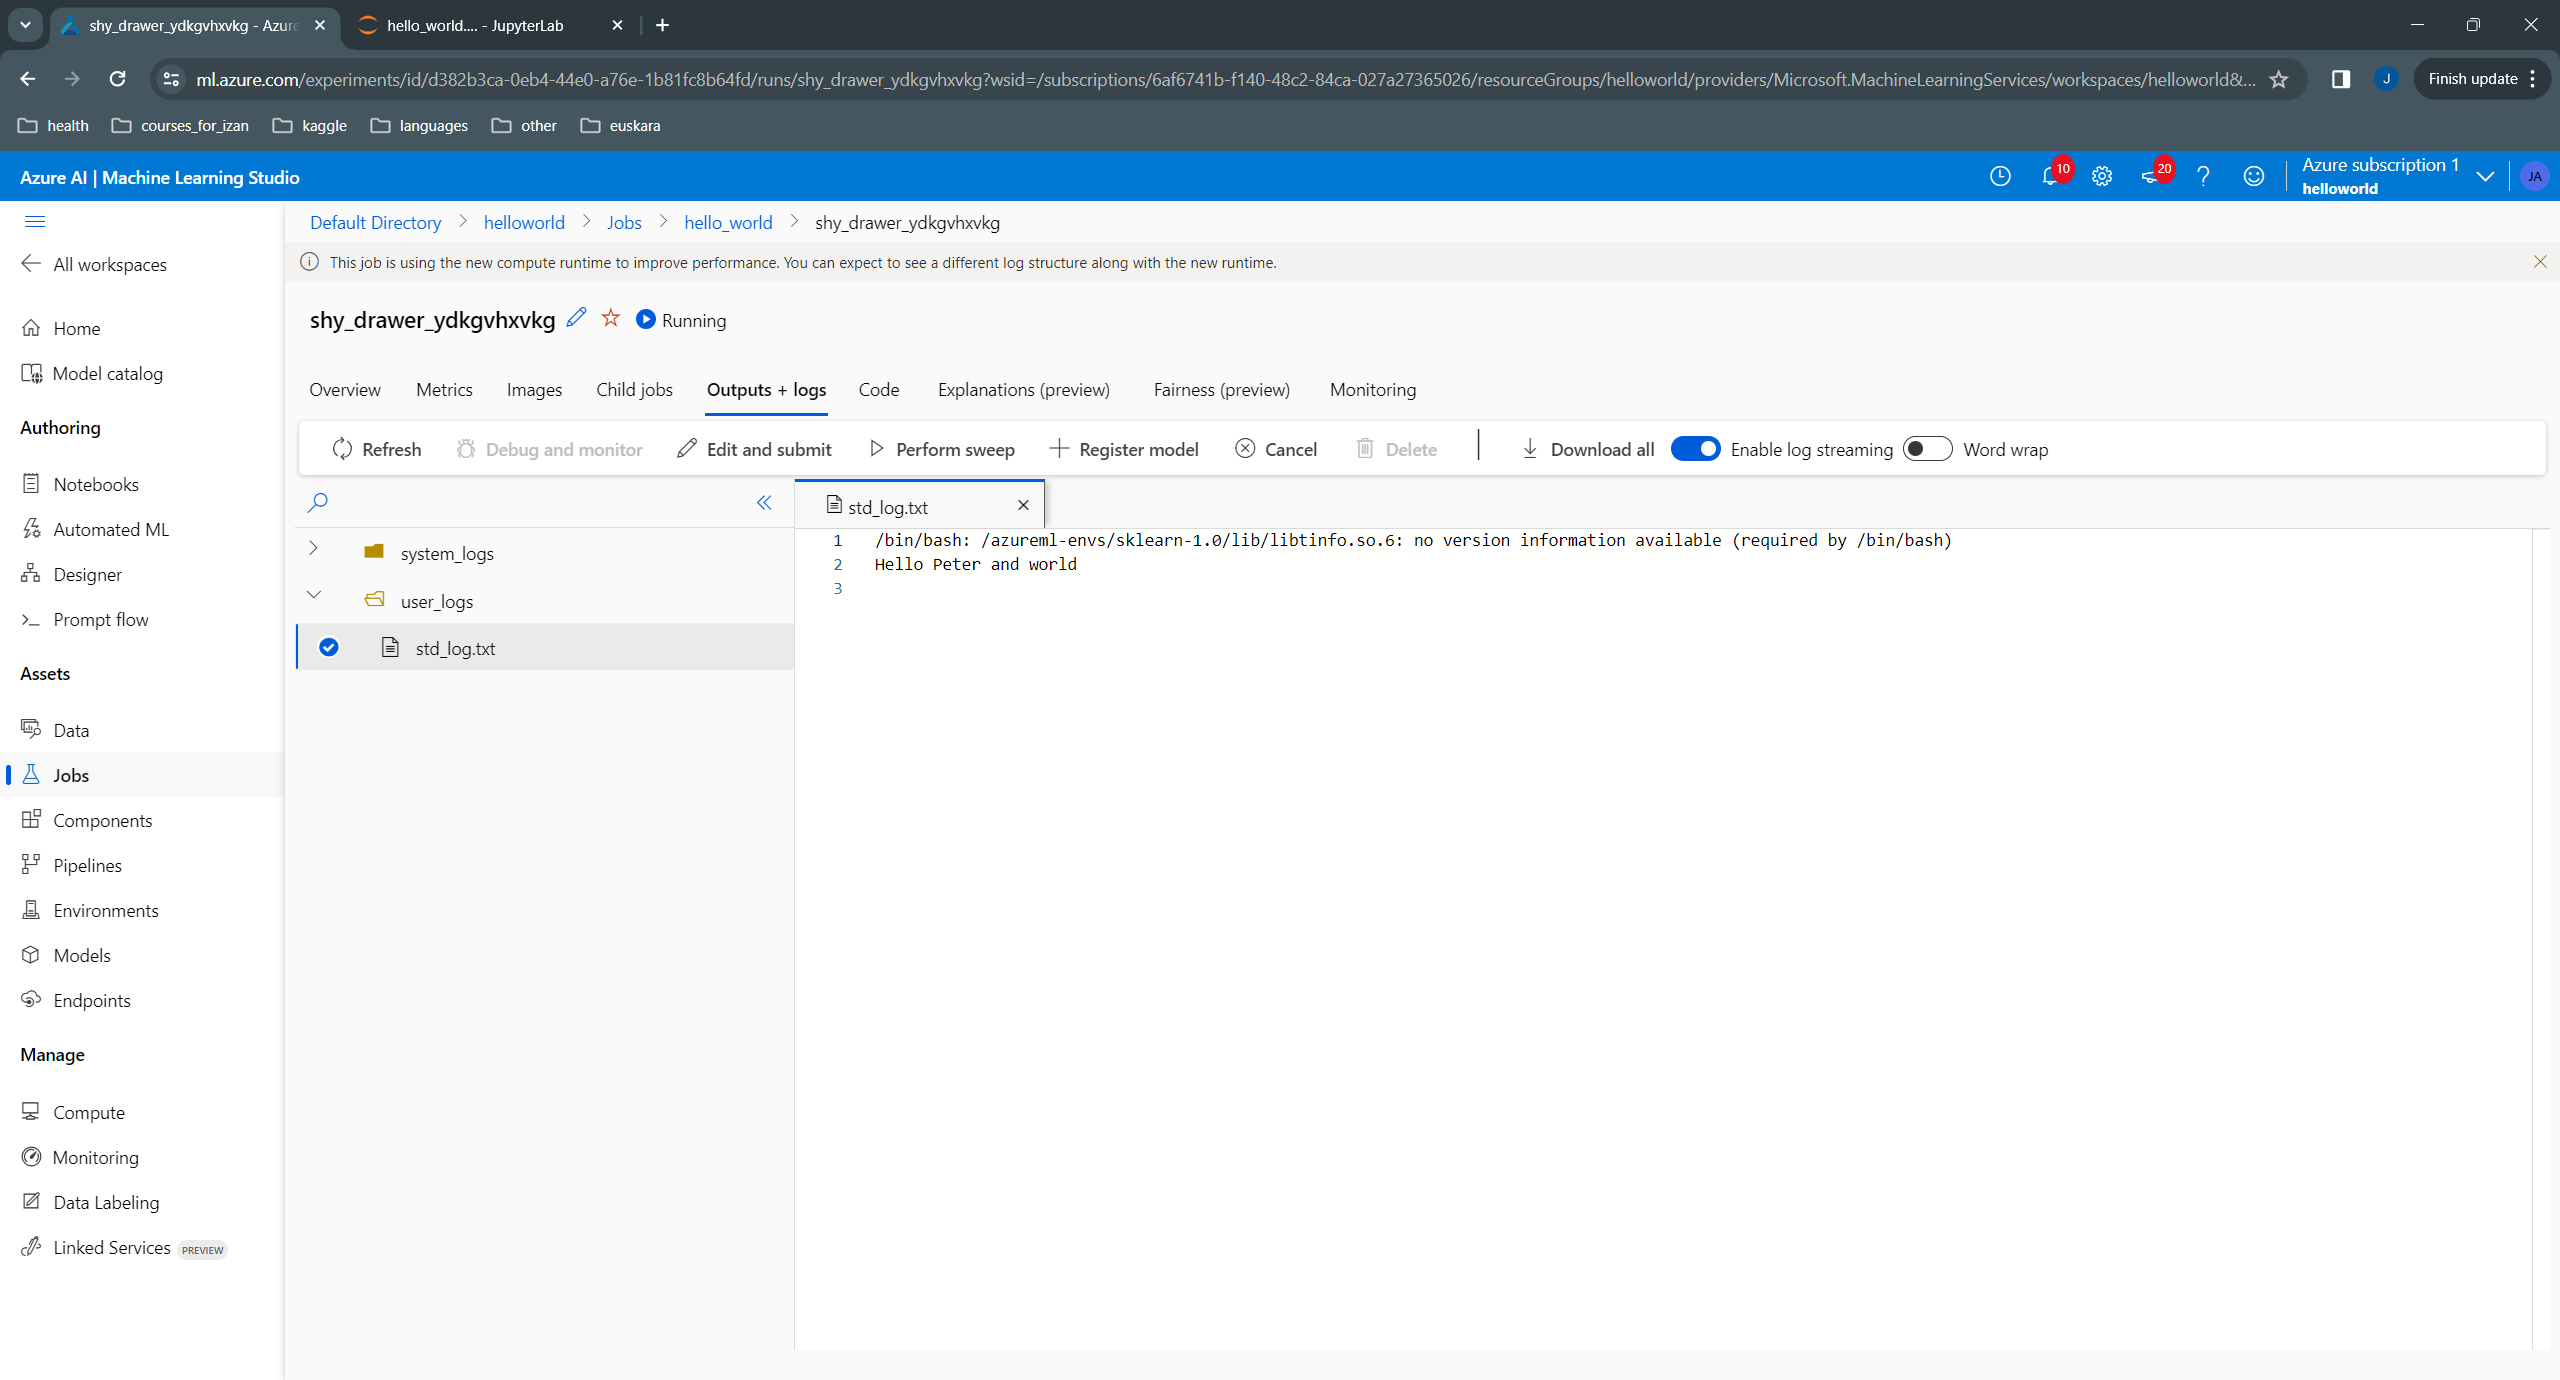

## Creating single component pipeline

In [ ]:
hello_world_component = ml_client.create_or_update(job.component)

Uploading hello_world (8.58 MBs): 100%|██████████| 8578531/8578531 [00:00<00:00, 21700197.27it/s]




In [ ]:
# the dsl decorator tells the sdk that we are defining an Azure Machine Learning pipeline
from azure.ai.ml import dsl

@dsl.pipeline(
    compute="serverless",  # "serverless" value runs pipeline on serverless compute
    description="E2E hello world pipeline",
)
def hello_world_pipeline(
    pipeline_job_input,
):
    # using data_prep_function like a python call with its own inputs
    hello_world_job = hello_world_component(
        name=pipeline_job_input,
    )

In [ ]:
# Let's instantiate the pipeline with the parameters of our choice
pipeline = hello_world_pipeline(
    pipeline_job_input="David",
)

In [ ]:
pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    # Project's name
    experiment_name="e2e_registered_components",
)
ml_client.jobs.stream(pipeline_job.name)

Class AutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class AutoDeleteConditionSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseAutoDeleteSettingSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class IntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class ProtectionLevelSchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.
Class BaseIntellectualPropertySchema: This is an experimental class, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


RunId: shy_cabbage_xb9vv4fswl
Web View: https://ml.azure.com/runs/shy_cabbage_xb9vv4fswl?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld

Streaming logs/azureml/executionlogs.txt

[2024-03-26 14:08:19Z] Submitting 1 runs, first five are: 605cf9a7:d9904e2d-3ecb-4ddc-a04d-e2fed4facfe6
[2024-03-26 14:12:40Z] Completing processing run id d9904e2d-3ecb-4ddc-a04d-e2fed4facfe6.

Execution Summary
RunId: shy_cabbage_xb9vv4fswl
Web View: https://ml.azure.com/runs/shy_cabbage_xb9vv4fswl?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld



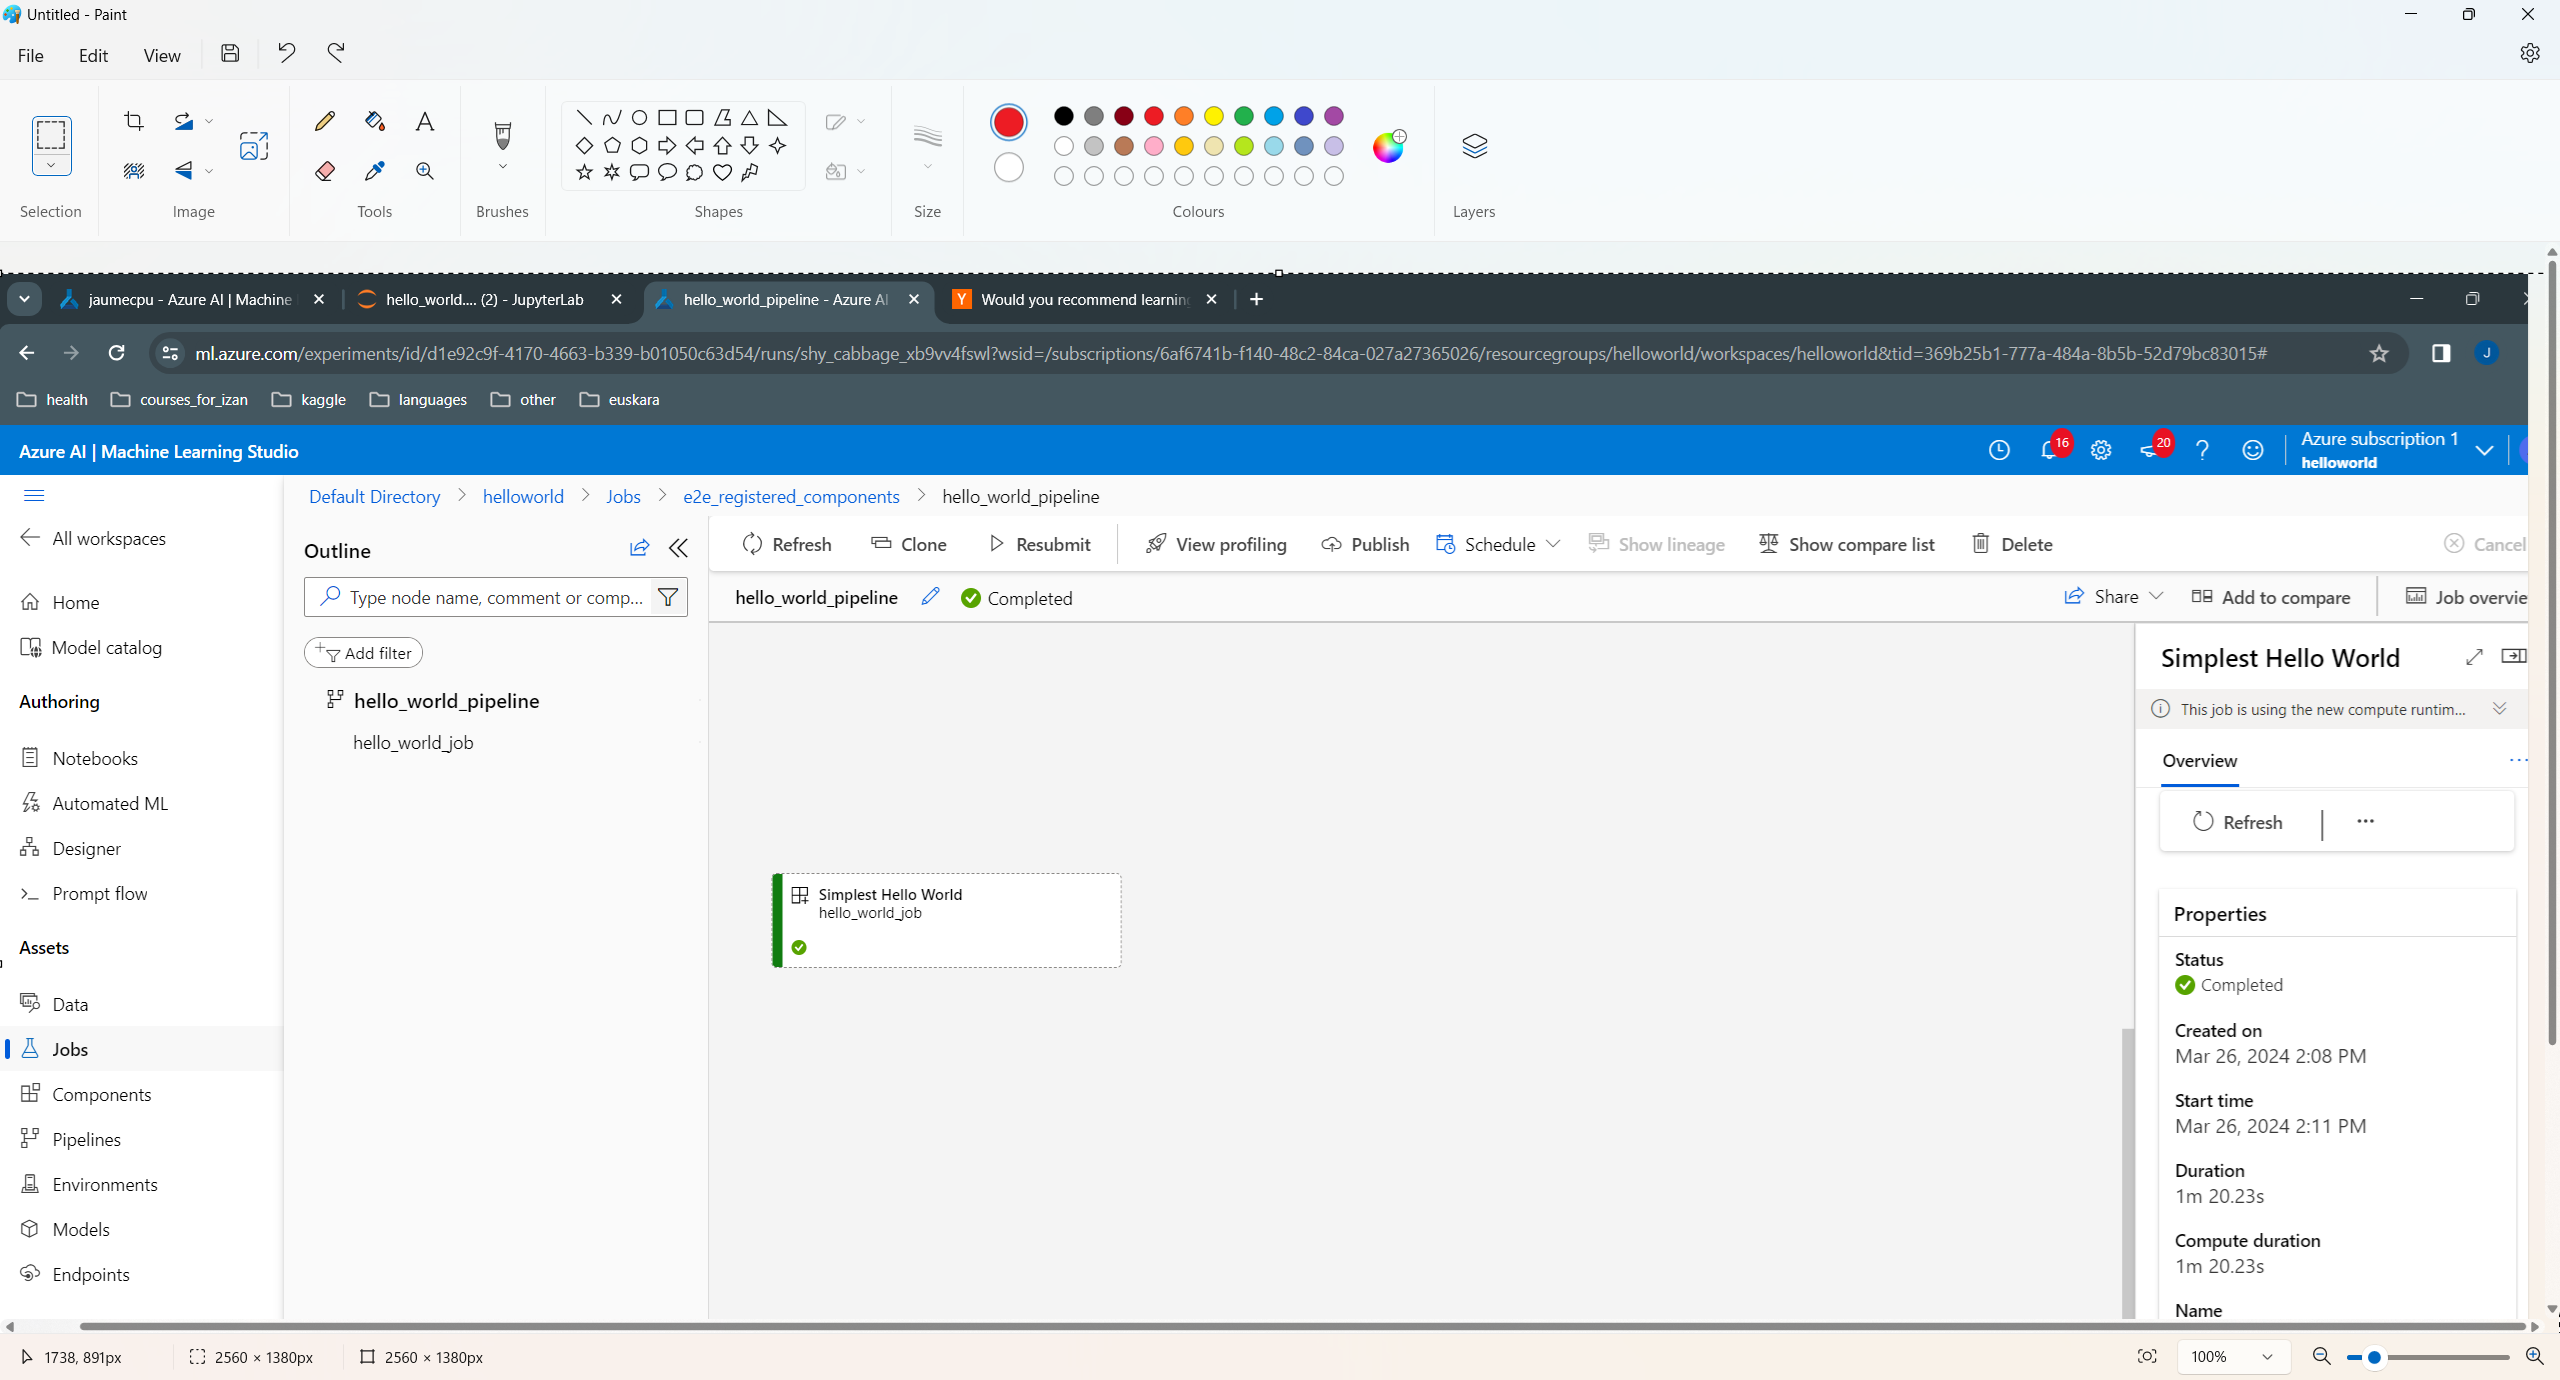

### Adding an input

In [ ]:
from azure.ai.ml import Input

job = command(
    inputs=dict(
        name=Input (type="string"),
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_core.py --name ${{inputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World witn Input",
)

hello_world_component = ml_client.create_or_update(job.component)

Uploading hello_world (8.59 MBs): 100%|██████████| 8589758/8589758 [00:00<00:00, 24178345.78it/s]




In [ ]:
# the dsl decorator tells the sdk that we are defining an Azure Machine Learning pipeline
from azure.ai.ml import dsl

@dsl.pipeline(
    compute="serverless",  # "serverless" value runs pipeline on serverless compute
    description="E2E hello world pipeline with input",
)
def hello_world_pipeline(
    pipeline_job_input,
):
    # using data_prep_function like a python call with its own inputs
    hello_world_job = hello_world_component(
        name=pipeline_job_input,
    )

In [ ]:
pipeline = hello_world_pipeline(
    pipeline_job_input="Joseph",
)

pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    # Project's name
    experiment_name="e2e_hello_world_with_input",
)
ml_client.jobs.stream(pipeline_job.name)

RunId: olive_plastic_gvnjy01b5s
Web View: https://ml.azure.com/runs/olive_plastic_gvnjy01b5s?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld

Streaming logs/azureml/executionlogs.txt

[2024-03-26 14:38:43Z] Submitting 1 runs, first five are: cd1599c4:ce24c41e-946d-48cd-99b2-70ebde3befb2
[2024-03-26 14:44:58Z] Completing processing run id ce24c41e-946d-48cd-99b2-70ebde3befb2.

Execution Summary
RunId: olive_plastic_gvnjy01b5s
Web View: https://ml.azure.com/runs/olive_plastic_gvnjy01b5s?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld



Notes about Input:
    
- When using Input(type="uri_folder") or Input(type="uri_file"), the value passed cannot be a string, it must be an Input type, for example:
   
```python
job = command(
    inputs=dict(
        file_name=Input (type="uri_file"),
    ),
    ...
)

pipeline = hello_world_pipeline(
    pipeline_job_input=Input(path="/path/to/file"),
)
```

- However, when using Input(type="string") or Input(type="number"), the input must be a string or number, not Input
```python
job = command(
    inputs=dict(
        name=Input (type="string"),
    ),
    ...
)

pipeline = hello_world_pipeline(
    pipeline_job_input="Mary",
)
```

- In the latter case, the input does not appear in the graph of the pipeline, in the UI.

### Using uri_file as input

In [ ]:
# Component definition and registration
job = command(
    inputs=dict(
        name=Input (type="uri_file"),
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_core.py --name ${{inputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with uri_file",
)
hello_world_component = ml_client.create_or_update(job.component)

# Pipeline definition and registration
@dsl.pipeline(
    compute="serverless",  # "serverless" value runs pipeline on serverless compute
    description="E2E hello world pipeline with input",
)
def hello_world_pipeline(
    pipeline_job_input,
):
    # using data_prep_function like a python call with its own inputs
    hello_world_job = hello_world_component(
        name=pipeline_job_input,
    )

pipeline = hello_world_pipeline(
    pipeline_job_input=Input(type="uri_file", path="./hello_world_core.py"),
)

pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    # Project's name
    experiment_name="e2e_hello_world_with_uri_file",
)

# Pipeline running
ml_client.jobs.stream(pipeline_job.name)

Uploading hello_world (8.59 MBs): 100%|██████████| 8588206/8588206 [00:00<00:00, 24482901.98it/s]


Uploading hello_world_core.py (< 1 MB): 0.00B [00:00, ?B/s] (< 1 MB): 100%|██████████| 514/514 [00:00<00:00, 12.0kB/s]




RunId: great_tail_pw48pry0lj
Web View: https://ml.azure.com/runs/great_tail_pw48pry0lj?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld

Streaming logs/azureml/executionlogs.txt

[2024-03-26 15:06:11Z] Submitting 1 runs, first five are: a08118c5:2099b6ad-fb3a-4cac-9557-c8cf355b8b1b
[2024-03-26 15:11:50Z] Completing processing run id 2099b6ad-fb3a-4cac-9557-c8cf355b8b1b.

Execution Summary
RunId: great_tail_pw48pry0lj
Web View: https://ml.azure.com/runs/great_tail_pw48pry0lj?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld



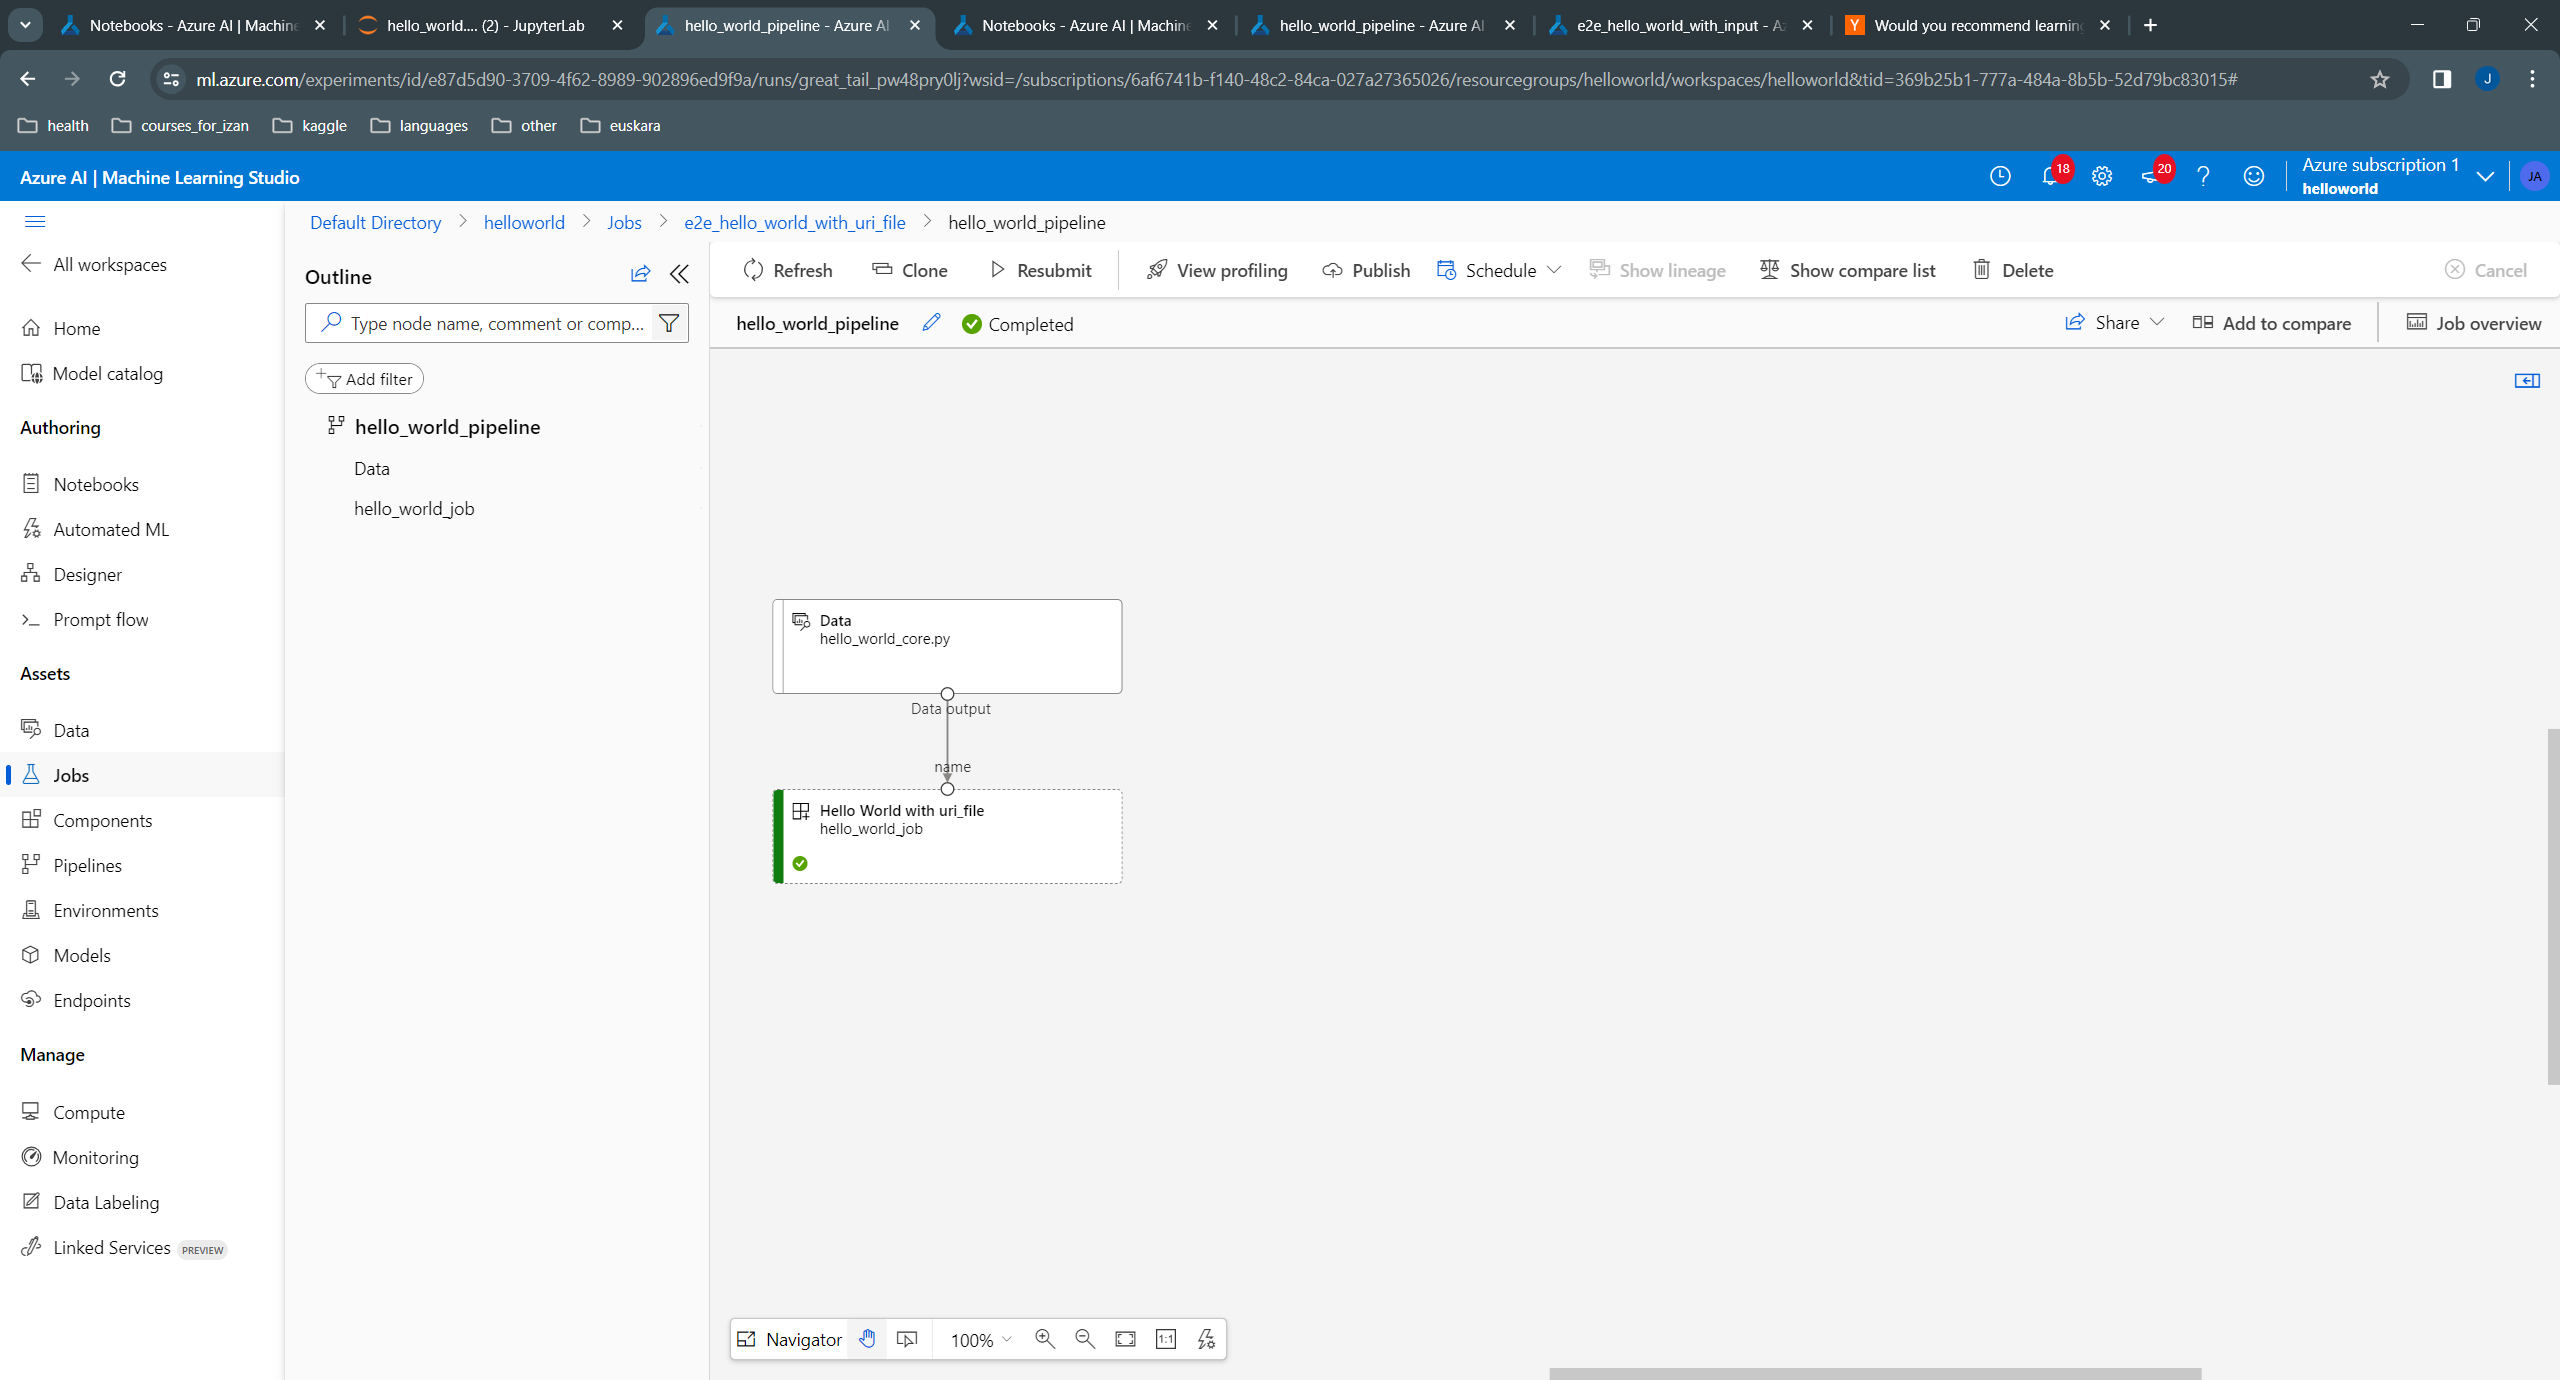

- If you click on the "Data" component and inside it click on "Explore", you can see the contents of the file, since it is a text python file.

### Adding an output

In [ ]:
from azure.ai.ml import Output

In [ ]:
# Component definition and registration
job = command(
    outputs=dict(
        name=Output (type="uri_file"),
    ),
    code=f"./",  # location of source code: in this case, the root folder
    command="python hello_world_core.py --name ${{outputs.name}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Hello World with uri_file as output",
)
hello_world_component = ml_client.create_or_update(job.component)

# Pipeline definition and registration
@dsl.pipeline(
    compute="serverless",  # "serverless" value runs pipeline on serverless compute
    description="E2E hello world pipeline with input",
)
def hello_world_pipeline(
):
    # using data_prep_function like a python call with its own inputs
    hello_world_job = hello_world_component()

pipeline = hello_world_pipeline()

pipeline_job = ml_client.jobs.create_or_update(
    pipeline,
    # Project's name
    experiment_name="e2e_hello_world_with_uri_file_as_output",
)

# Pipeline running
ml_client.jobs.stream(pipeline_job.name)

Uploading hello_world (9.48 MBs): 100%|██████████| 9483085/9483085 [00:00<00:00, 22969826.09it/s]




RunId: teal_soccer_m9bkcgz2gq
Web View: https://ml.azure.com/runs/teal_soccer_m9bkcgz2gq?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld

Streaming logs/azureml/executionlogs.txt

[2024-03-26 15:36:23Z] Submitting 1 runs, first five are: 528b20ac:27e32a0a-71a0-4bc3-abec-eaeae70ff08e
[2024-03-26 15:41:30Z] Completing processing run id 27e32a0a-71a0-4bc3-abec-eaeae70ff08e.

Execution Summary
RunId: teal_soccer_m9bkcgz2gq
Web View: https://ml.azure.com/runs/teal_soccer_m9bkcgz2gq?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld



## Pipeline with two components

In order to have something more meaningful, we create a pipeline with two components. The first one "pre-processes" the input data frame by adding one (or a specified number) to it, storing the output as a csv file. The second component builds a "model" by calculating the mean and standard deviation, and saves it as pickle file.

### make subfolders and create dummy data

Whenever we have multiple components, a common practice in Azure ML is to have a dedicated subfolder for each one. The subfolder contains the source .py file implementing the component, and may contain a conda yaml file with dependencies that are specific for this component. In our case, we use a pre-built environment so that we don't need to include any conda yaml file.

In [ ]:
import os

os.makedirs ("preprocessing", exist_ok=True)
os.makedirs ("training", exist_ok=True)
os.makedirs ("data", exist_ok=True)

In [ ]:
import pandas as pd

df = pd.DataFrame (
    {
        "a": [1,2,3],
        "b": [4,5,6],
    },
)

df.to_csv ("data/dummy_input.csv")

### preprocessing component

In [ ]:
%%writefile preprocessing/preprocessing.py
import argparse
import pandas as pd

def preprocessing (df, x):
    """Adds `x` to input data frame `df`."""
    
    print ("Input\n", df)
    print (f"Adding {x} to df")
    df = df + x
    print ("Output\n", df)
    return df

def parse_args ():
    """Parses input arguments"""
    
    parser = argparse.ArgumentParser()
    parser.add_argument("--input_data", type=str, help="path to input data frame")
    parser.add_argument("--preprocessed_data", type=str, help="path to output data frame")
    parser.add_argument("-x", type=int, help="number to add")
    args = parser.parse_args()
    
    return args

def read_and_preprocess (
    input_data,
    x,
    preprocessed_data,
):
    df = pd.read_csv (input_data)
    df = preprocessing (df, args.x)
    df.to_csv (preprocessed_data)
    
def main():
    """Main function of the script."""
    
    args = parse_args ()
    read_and_preprocess (args.input_data, args.x, args.preprocessed_data)

if __name__ == "__main__":
    main()

Overwriting preprocessing/preprocessing.py


In [ ]:
# Component definition and registration
preprocessing_command = command(
    inputs=dict(
        input_data=Input (type="uri_file"),
        x=Input (type="number"),
    ),
    outputs=dict(
        preprocessed_data=Output (type="uri_file"),
    ),
    code=f"./preprocessing/",  # location of source code: in this case, the root folder
    command="python preprocessing.py --input_data ${{inputs.input_data}} -x ${{inputs.x}} --preprocessed_data ${{outputs.preprocessed_data}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Pre-processing",
)
preprocessing_component = ml_client.create_or_update(preprocessing_command.component)

Uploading preprocessing (0.0 MBs): 100%|██████████| 993/993 [00:00<00:00, 109270.22it/s]




### training component

In [ ]:
%%writefile training/training.py
import argparse
import joblib
import pandas as pd

def train_model (df):
    """Adds `x` to input data frame `df`."""
    
    print ("Input\n", df)
    mu = df.mean().values
    std = df.std().values
    print ("mu:\n", mu)
    print ("std:\n", std)
    return mu, std

def parse_args ():
    """Parses input arguments"""
    
    parser = argparse.ArgumentParser()
    parser.add_argument("--preprocessed_data", type=str, help="path to preprocessed data")
    parser.add_argument("--model", type=str, help="path to built model")
    args = parser.parse_args()
    
    return args

def read_and_train (
    preprocessed_data,
    model_path,
):
    df = pd.read_csv (preprocessed_data)
    model = train_model (df)
    joblib.dump (model_path)

def main():
    """Main function of the script."""
    
    args = parse_args ()
    read_and_train (args.preprocessed_data, args.model)

if __name__ == "__main__":
    main()

Overwriting training/training.py


In [ ]:
# Component definition and registration
training_command = command(
    inputs=dict(
        preprocessed_data=Input (type="uri_file"),
    ),
    outputs=dict(
        model=Output (type="uri_file"),
    ),
    code=f"./training/",  # location of source code: in this case, the root folder
    command="python training.py --preprocessed_data ${{inputs.preprocessed_data}} --model ${{outputs.model}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Training",
)

try:
    training_component = ml_client.create_or_update(training_command.component)
except Exception as e:
    print (e)

Uploading training (0.0 MBs): 100%|██████████| 923/923 [00:00<00:00, 107564.19it/s]




Notes:

- Note that the input to the training component is the output from the preprocessing component, and this is indicated in the command argument, where we say `--preprocessed_data ${{preprocessing_component.outputs.preprocessed_data}}`
- The previous code fails because we cannot indicate uri_file as output from one component to the next one.

### alternative

In [ ]:
# Component definition and registration
preprocessing_command = command(
    inputs=dict(
        input_data=Input (type="uri_file"),
        x=Input (type="number"),
    ),
    outputs=dict(
        preprocessed_data=Output (type="uri_folder"),
    ),
    code=f"./preprocessing/",  # location of source code: in this case, the root folder
    command="python preprocessing.py --input_data ${{inputs.input_data}} -x ${{inputs.x}} --preprocessed_data ${{outputs.preprocessed_data}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Pre-processing",
)
preprocessing_component = ml_client.create_or_update(preprocessing_command.component)

training_command = command(
    inputs=dict(
        preprocessed_data=Input (type="uri_folder"),
    ),
    outputs=dict(
        model=Output (type="uri_file"),
    ),
    code=f"./training/",  # location of source code: in this case, the root folder
    command="python training.py --preprocessed_data ${{inputs.preprocessed_data}} --model ${{outputs.model}}",
    environment="AzureML-sklearn-1.0-ubuntu20.04-py38-cpu@latest",
    display_name="Training",
)

try:
    training_component = ml_client.create_or_update(training_command.component)
except Exception as e:
    print (e)

{
  "result": "Failed",
  "errors": [
    {
      "message": "Invalid data binding expression: preprocessing_component.outputs.preprocessed_data",
      "path": "command",
      "value": "python training.py --preprocessed_data ${{preprocessing_component.outputs.preprocessed_data}} --model ${{outputs.model}}"
    }
  ]
}


### pipeline

In [ ]:
# Pipeline definition and registration
@dsl.pipeline(
    compute="serverless",  # "serverless" value runs pipeline on serverless compute
    description="E2E hello world pipeline with input",
)
def two_components_pipeline(
    pipeline_job_data_input,
    pipeline_job_x,
):
    # using data_prep_function like a python call with its own inputs
    preprocessing_job = preprocessing_component(
        input_data=pipeline_job_data_input,
        x=pipeline_job_x,
    )

    # using train_func like a python call with its own inputs
    training_job = training_component(
        preprocessed_data=preprocessing_job.outputs.preprocessed_data,  # note: using outputs from previous step
    )

two_components_pipeline = two_components_pipeline(
    pipeline_job_data_input=Input(type="uri_file", path="./data/dummy_input.csv"),
    pipeline_job_x=10,
)

two_components_pipeline_job = ml_client.jobs.create_or_update(
    two_components_pipeline,
    # Project's name
    experiment_name="e2e_two_components_pipeline",
)

# Pipeline running
ml_client.jobs.stream(two_components_pipeline_job.name)

RunId: helpful_panda_s0cjx957fh
Web View: https://ml.azure.com/runs/helpful_panda_s0cjx957fh?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld

Streaming logs/azureml/executionlogs.txt

[2024-03-26 16:34:39Z] Submitting 1 runs, first five are: 78ed9672:be3e3ff7-e099-4b2e-8d47-ca6235673370
[2024-03-26 16:36:14Z] Execution of experiment failed, update experiment status and cancel running nodes.

Execution Summary
RunId: helpful_panda_s0cjx957fh
Web View: https://ml.azure.com/runs/helpful_panda_s0cjx957fh?wsid=/subscriptions/6af6741b-f140-48c2-84ca-027a27365026/resourcegroups/helloworld/workspaces/helloworld


JobException: Exception : 
 {
    "error": {
        "code": "UserError",
        "message": "Pipeline has failed child jobs. Failed nodes: /preprocessing_job. For more details and logs, please go to the job detail page and check the child jobs.",
        "message_format": "Pipeline has failed child jobs. {0}",
        "message_parameters": {},
        "reference_code": "PipelineHasStepJobFailed",
        "details": []
    },
    "environment": "eastus2",
    "location": "eastus2",
    "time": "2024-03-26T16:36:14.233106Z",
    "component_name": ""
} 

In [ ]:
Execution failed. User process 'python' exited with status code 1. Please check log file 'user_logs/std_log.txt' for error details. Error: Traceback (most recent call last):
  File "preprocessing.py", line 32, in <module>
    main()
  File "preprocessing.py", line 27, in main
    df = pd.read_csv (args.input_data)
NameError: name 'pd' is not defined
